# <font color='#0174BE'>ICE: Detrás de la Pantalla - Desglose Analítico del Mundo del Gaming

__Objetivo del Proyecto:__

El objetivo central de este proyecto ha sido extraer insights significativos a partir de los datos recopilados por ICE a lo largo de los años. Desde el análisis de tendencias de ventas hasta la correlación entre reseñas y el rendimiento comercial, cada aspecto ha sido meticulosamente examinado para proporcionar una visión integral del panorama de la industria de los videojuegos.



## Contenido <a id='back'></a>

* [Datos](#1)
    * [1.1 Importar librerias](#1.1)
    * [1.2 Cargar los datos](#1.2)
* [Preparar los datos](#2)
    * [2.1 Análisis exploratorio del DataFrmae](#2.1)
    * [2.2 Observaciones del análisis explorato](#2.2)
    * [2.3 Corregir datos](#2.3)
    * [2.4 Conclusiones](#2.4)
    * [2.5 Añadir columna "ventas_totales"](#2.5)
* [Análisis de los datos](#3)
    * [3.1 Juegos lanzados en diferentes años. ¿Son significativos los datos de cada período?](#3.1)
    * [3.2 Variación de ventas entre plataformas](#3.2)
        * [3.2.1 Plataformas que solían ser populares pero que ahora no tienen ventas](#3.2.1)
        * [3.2.2 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?](#3.2.2)
    * [3.3 Construcción de un modelo para 2017](#3.3)
        * [3.3.1 ¿Qué plataformas son líderes en ventas?](#3.3.1)
        * [3.3.2 ¿Cuáles crecen y cuáles se reducen?](#3.3.2)
        * [3.3.3 Diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma](#3.3.3) 
            * [3.3.3.1 ¿Son significativas las diferencias en las ventas? >¿Qué sucede con las ventas promedio en varias plataformas?](#3.3.3.1)
         * [3.3.4 Gráfico de dispersión y correlación entre las reseñas y las ventas  -  Solución gráfica y analítica](#3.3.4)
         * [3.3.5 Comparación de los mismos juegos entre plataformas](#3.3.5)
            * [3.3.5.1 Juegos compartidos por cada plataforma](#3.3.5.1)
            * [3.3.5.2 Ventas totales de juegos por cada plataforma y juegos compartidos](#3.3.5.2)
         * [3.3.6 Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?](#3.6)
* [Perfil del usuario pónor cada región](#4)
* [4.1 Las cinco plataformas principales. Descripción de las variaciones en la cuotas de mercado de una región a otra.](#4.1)
    * [4.1.1 Unión Europea](#4.1.1)
    * [4.1.2 Norte América](#4.1.2)
    * [4.1.3 Japón](#4.1.3)
    * [4.1.4 Otras Regiones](#4.1.4)
* [4.2 Los cinco géneros principales.](#4.2)
    * [4.2.1 Unión Europea](#4.2.1)
    * [4.2.2 Norte América](#4.2.2)
    * [4.2.3 Japón](#4.2.3)
    * [4.2.4 Otras Regiones](#4.2.4)
* [4.3 ¿Las clasificaciones ESRB afectan a las ventas en las regiones individuales?](#4.3)
    * [4.3.1 Unión Europea](#4.3.1)
    * [4.3.2 Norte América](#4.3.2)
    * [4.3.3 Japón](#4.3.3)
    * [4.3.4 Otras Regiones](#4.3.4)
* [5 Prueba de hipótesis](#5)
    * [5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.](#5.1)
    * [5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.](#5.2)
* [Conclusiones](#end)

## Datos <a id='1'></a>

- 1.1 Importar librerias
- 1.2 Cargar los datos


###  Importar librerias<a id='1.2'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind


###  Cargar datos<a id='1.2'></a>

In [2]:
games = pd.read_csv("/games.csv")

## <font color='#0174BE'> Preparar los datos<a id='2'></a>
    
[Volver a Contenidos](#back)    
>- 2.1 Análisis exploratorio del DataFrame: games
>- 2.2 Observaciones del analisis exploratorio
>- 2.3 Corregir datos
>- 2.4 Verificar la existencia de duplicados y duplicados implícitos.
>- 2.5 Añadir columna "ventas_totales"

###  <font color='#0174BE'> Análisis exploratorio del DataFrame: games<a id='2.1'></a>

    
[Volver a Contenidos](#back)

In [3]:
# Mostramos la información general del DataFrame.                                               
games.info(show_counts = True)
print()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### <font color='#0174BE'> Observaciones del analisis exploratorio<a id='2.2'></a>
1. El DataFrame tiene 16715 datos y 11 columnas.
2. Es necesario convertir el nombre de las columnas a minúsculas.
2. Los datos son apropiados para la información proporcionada excepto:
    - Year_of_release este debe ser tipo object
    - Critic_Score debe ser del tipo int64
    - User_score también debe ser tipo float64
3. Existe la presencia de valores ausentes:
    - Name: 2 ~ 0.011 %
    - Year_of_release 269 ~ 1.6 %
    - Genre 2 ~ 0.011 %
    - Platform: 269 ~ 1.6 %
    - Critic_Score: 8578 ~ 51.31 %
    - User_score:   6701 ~ 40.08 %
    - rating:       6766 ~ 40.47 %
4. La columna User_Score tiene la abreviatura TBD (To Be Determinated)
5. La mayoría de los vaores ausentes y de la abreviatura TBD se encuentran en juegos cuyas ventas son inferiores a 1.

### <font color='#0174BE'> Corregir Datos<a id='2.3'></a>
    
[Volver a Contenidos](#back)    

In [4]:
# Convertir a minúsculas los nombres de las columnas.
                                                    
games.columns = games.columns.str.lower()



 
#  Criterios para rellenar valores ausentes:

#  Parte 1  Por ser del tipo  Object se sustituirán por "Unkown" las columnas:
                  
#                  "name" 
#                  "genre"  
#                  "platform" 
    
#      -  No se harán operaciones numéricas con estas columnas, y lo mejor es mantenerlas como 
#         objetos para categorizarlas a futuro.


#  Rellenar valores ausentes por "Unknown"
games['name'] = games['name'].fillna("Unknown")
games['platform'] = games['platform'].fillna("Unknown")
games['genre'] = games['genre'].fillna("Unknown")






# Rellenar las columnas:   - year_of_release
#                          - user_score
#                          - critic_score

# con ceros

#     -  Reemplazar en la columna user_score "tbd" por NaN
games['user_score'].replace('tbd', np.nan, inplace=True)


#     -  Convertir ambas columnas a float64
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

#     -  Llenar valores ausentes con 0
games['year_of_release'] = games['year_of_release'].fillna(0)

# Convertir a enteros 
games['year_of_release'] = games['year_of_release'].astype("int")






# Parte 2  Por ser de tipo numérico se agruparan por:

#                         - platform
#                         - year_of_release                       

#         Se obtendra la mediana por cada plataforma en este rubro y,
#         posteriormente se juntará toda esta información nueva.
       
#      -  En user_score las siglas  "tbd"  también se sitituirán "nan", ya que, "tbd" se usa
#         cuando existen menos de 4 calificaciones.
        
#      -  La mediana es una medida robusta que puede ser menos sensible a valores atípicos  
#         que la media, por lo que es una elección prudente en presencia de un número 
#         considerable de valores ausentes.
  
# 'Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
# 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
# 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'
 

    
    
def calcular_mediana_y_reemplazar_para_plataforma(df, plataforma, columna):
    # Filtrar el DataFrame para la plataforma específica
    plataforma_df = df[df["platform"] == plataforma]
    
    # Hacer una copia del DataFrame
    plataforma_df = plataforma_df.copy()
    
    # Calcular la mediana para valores mayores que cero
    mediana = plataforma_df.loc[plataforma_df[columna] > 0, columna].median()
    
    # Reemplazar los valores iguales a cero con la mediana calculada
    plataforma_df.loc[plataforma_df[columna] == 0, columna] = mediana
    
    # Actualizar el DataFrame original con los cambios realizados
    df.loc[df["platform"] == plataforma] = plataforma_df
    
    return df

# Ejemplo de uso para cada plataforma
plataformas = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 
               'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 
               'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 
               'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

columnas_a_procesar = ["year_of_release"] # Se pueden agregar más columnas si se desea como user_score por ejemplo

for plataforma in plataformas:
    for columna in columnas_a_procesar:
        games = calcular_mediana_y_reemplazar_para_plataforma(games, plataforma, columna)

        
        
# Parte 3  Columna "rating" se sustituirá por: "RP" 
#      -  De acuerdo a la ESRB (Guía de clasificaciónes) RP significa "Aún sin clasificar"   
 
# Reemplazar valores ausentes por RP
games["rating"] = games["rating"].fillna("RP")        
   
    
    
    
    
# Imprimir el DataFrame actualizado


games.info(show_counts = True)





# Este código presenta el número de datos faltantes por plataforma

#isna_counts = {}

#for platform in games["platform"].unique():
#    platform_df = games[games["platform"] == platform]
#    isna_count = platform_df[["critic_score", "user_score"]].isna().sum()
#    isna_counts[platform] = isna_count

# Imprimir los resultados
#for platform, count in isna_counts.items():
#    print(f"Plataforma: {platform}, Valores faltantes: {count}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<font color='#0174BE'>__Tabla de valores faltantes en plataformas:__

La siguiente tabla presenta los valores faltantes en cada plataforma, como se verá en 3.2 "*Variación de entas entre plataformas*" ninguno de estos valores afecta el presente estudio.

|Plataforma|Valores faltantes|
|----------|-----------------|
|NES|98|
|GB|98|
|SNES|239|
|N64|319|
|2600|133|
|GEN|29|
|SAT|173|
|SCD|6|
|WS|6|
|NG|12|
|TG16|2|
|3DO|3|
|GG|1|
|PCFX|1|

<font color='#0174BE'> __Conclusione sobre la correcición de datos__<a id='2.4'></a>

[Volver a Contenidos](#back)    
<font color='#000000'>
    
>**Valores ausentes**
>        
>__1. Naturaleza Dinámica del Contenido en Línea:__
    - Los juegos en línea suelen recibir actualizaciones y expansiones continuas. Los datos  pueden no estar completos si ciertos juegos se lanzaron después de la última actualización del conjunto de datos o si los datos no se han actualizado recientemente.
>
>__2. Participación Voluntaria de los Usuarios:__
    - La información en plataformas en línea a menudo se recopila a través de la participación voluntaria de los usuarios. Algunos usuarios pueden optar por no proporcionar ciertos detalles, como la calificación o la fecha de lanzamiento de un juego.
>
>__3. Privacidad y Confidencialidad:__
    - Los jugadores en línea pueden tener preocupaciones sobre la privacidad y la confidencialidad de ciertos datos. Las empresas pueden optar por no revelar cierta información por respeto a la privacidad de los usuarios.
>
>__4. Diversidad de Desarrolladores y Juegos:__
    - La industria de los juegos en línea es muy diversa, con numerosos desarrolladores y una amplia variedad de juegos. La consistencia en la presentación de datos puede variar entre diferentes desarrolladores y plataformas.
>
>__5. Falta de Estandarización:__
    - La falta de estandarización en la presentación de datos entre diferentes desarrolladores o plataformas puede dar lugar a inconsistencias y valores ausentes.
>
>__6. Evaluación Subjetiva de Calificaciones y Reseñas:__
    - En el caso de calificaciones y reseñas proporcionadas por los usuarios, algunos jugadores pueden optar por no calificar o revisar ciertos juegos.

### <font color='#0174BE'> Verificar la existencia de duplicados y duplicados implícitos.
[Volver a Contenidos](#back)

In [5]:
# Verificamos la existencia de duplicados

print("Filas totalmente duplicadas:")
print(games.duplicated().value_counts())


print()


# Duplicados implícitos

#     -  Duplicados para las plataformas

print("Nombres de consolas unicas:")
print(games["platform"].unique())

print()

#     -  Duplicados para los juegos

print("Nombres de juegos duplicados:")
print(games["name"].duplicated().value_counts())

Filas totalmente duplicadas:
False    16715
dtype: int64

Nombres de consolas unicas:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Nombres de juegos duplicados:
False    11560
True      5155
Name: name, dtype: int64


<font color='#0174BE'> __Comentario:__
<font color='#000000'>
>- No existen filas duplicadas ni tampoco existen duplicados implícitos.
>- En el caso de "Juegos duplciados" es válida la existencia de los mismos ya que un mismo juego puede salir en varias plataformas, estos juegos se les conoce como "Third parties"

### <font color='#0174BE'> Añadir columna "ventas_totales"<a id='2.5'></a>
    
[Volver a Contenidos](#back)    

In [6]:
# Sumar las ventas de las 4 regiones

games["total_sales"] = (
                      games["na_sales"] 
                    + games["eu_sales"] 
                    + games["jp_sales"] 
                    + games["other_sales"]
                      )

#Verificamos
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


## <font color='#FFB000'> Análisis de los datos<a id='3'></a>
    
[Volver a Contenidos](#back)    
>- 3.1 Juegos lanzados en diferentes años. ¿Son significativos los datos de cada período?
>- 3.2 Variación de ventas entre plataformas
>    - 3.2.1 Plataformas que solían ser populares pero que ahora no tienen ventas
>    - 3.2.2 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
>- 3.3 Construcción de un modelo para 2017
>    - 3.3.1 ¿Qué plataformas son líderes en ventas?
>    - 3.3.2 ¿Cuáles crecen y cuáles se reducen?
>    - 3.3.3 Diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma, 
>       - 3.3.3.1 ¿Son significativas las diferencias en las ventas? >¿Qué sucede con las ventas promedio en varias plataformas? 
>    - 3.3.4 Gráfico de dispersión y correlación entre las reseñas y las ventas  -  Solución gráfica y analítica
>    - 3.3.5 Comparación de los mismos juegos entre plataformas
>       - 3.3.5.1 Juegos compartidos por cada plataforma
>       - 3.3.5.2 Ventas totales de juegos por cada plataforma y juegos compartidos
>    - 3.3.6 Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### <font color='#FFB000'> Juegos que fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?<a id='3.1'></a>
    
[Volver a Contenidos](#back)    

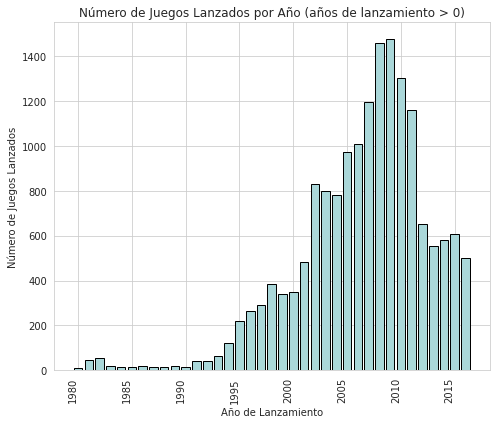

In [7]:
 
# EL presente gráfico de barras representa la cantidad de juegos 
# lanzados cada año desde 1980 hasta 2016
 

# Filtrar los datos para incluir solo los años de lanzamiento mayores que 0
filtered_data = games[games['year_of_release'] > 0]

# Obtener los datos
data_counts = filtered_data["year_of_release"].value_counts().sort_index()
years = data_counts.index
counts = data_counts.values

# Crear la gráfica de barras
plt.figure(figsize=(7, 6))

# Utilizar Seaborn para aplicar el estilo "whitegrid"
with sns.axes_style("whitegrid"):
    plt.bar(
        x=years,
        height=counts,
        color="#AAD7D9",
        edgecolor='black'

    )

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos Lanzados')
plt.title('Número de Juegos Lanzados por Año (años de lanzamiento > 0)')
plt.xticks(
    rotation=90,
    ha='right'
)
plt.tight_layout()
plt.show()


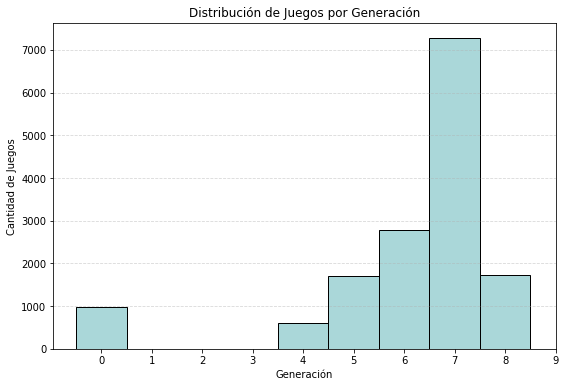

In [8]:
''' 
Categorizando las consolas por generación y su representación 
en un histograma.
        
''' 

# Crear un diccionario que mapea cada consola a su generación
#      -  PC al ser una consola multigenerción se le asignó el valor 0

generations_mapping = {
    '2600': 4,
    'NES': 4,
    'GB': 4,
    'SNES': 4,
    'PS': 5,
    'PS1': 5,
    'PSX': 5,
    'WS': 6,
    'GG': 6,
    'DS': 7,
    'X360': 7,
    'PS3': 7,
    'PS2': 6,
    'Wii': 7,
    'PS4': 8,
    '3DS': 8,
    'N64': 5,
    'PSP': 7,
    'XOne': 8,
    'WiiU': 8,
    'GC': 6,
    'GEN': 4,
    'DC': 6,
    'PSV': 8,
    'SAT': 5,
    'SCD': 4,
    'WS': 6,
    'NG': 5,
    'TG16': 4,
    '3DO': 5,
    'PCFX': 5,
    'PC': 0}

# Crear una nueva columna llamada 'Generation' usando el mapeo
games['generation'] = games['platform'].map(generations_mapping)


# Crear un histograma de las generaciones
plt.figure(figsize=(9, 6))
plt.hist(
         games['generation'], 
         bins=range(0, 10), 
         align='left', 
         rwidth=1, 
         color='#AAD7D9', 
         edgecolor='black'
         )

# Configurar el gráfico
plt.title('Distribución de Juegos por Generación')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Juegos')
plt.xticks(range(0, 10))
plt.grid(
         axis='y', 
         linestyle='--', 
         alpha=0.5
        )

<font color='#FFB000'> **Comentario:**
<font color='#000000'>

>La séptima generación de consolas fue la que más demanda de videojuegos tuvo, alcanzando su pico más alto en los años 2008 y 2009.
>
>La séptima generación de consolas de videojuegos, que abarca aproximadamente desde mediados de la década de 2000 hasta principios de la década de 2010, fue una época significativa en la evolución de la industria. 
>
>Séptima Generación (aprox. 2005-2013):
>
>__Consolas Destacadas:__
>- Xbox 360 (Microsoft)
>- PlayStation 3 (Sony)
>- Wii (Nintendo)
>
>
>__Innovaciones Destacadas:__
>- Mayor énfasis en las capacidades en línea y el juego multijugador en red.
>- Mayor potencia gráfica y resolución HD en comparación con generaciones anteriores.
>- Introducción de sensores de movimiento (Wii Remote, Kinect, PlayStation Move).
>
>__Cambio en el Paradigma del Juego:__
>
>- La Wii atrajo a un público más amplio con su enfoque en la jugabilidad innovadora y accesible.
>- Aumento en la popularidad de los juegos en línea y la >distribución digital.
>
>__Catálogo de Juegos Influyente:__
>- Títulos destacados como "Grand Theft Auto IV", "The Elder Scrolls V: Skyrim", "Uncharted 2: Among Thieves", y muchos más.
>
>__Éxito Comercial:__
>- La séptima generación experimentó un gran éxito comercial, con una base de usuarios significativa en todo el mundo.
>
>__Comparación con la Sexta Generación:__
>
>- Aumento significativo en la potencia de hardware y capacidades gráficas.
>- Mayor enfoque en la conectividad en línea y el juego en red.
>- Expansión del público objetivo con consolas como la Wii y su controlador de movimiento.
>
>__Comparación con la Octava Generación:__
>
>- Continuación de la tendencia hacia gráficos más avanzados y capacidades multimedia.
>- Mayor integración de servicios en línea y plataformas de distribución digital.
>- Introducción de nuevas consolas, como la PlayStation 4 y la Xbox One, con enfoque en la integración multimedia y social.
>
>
>En resumen, la séptima generación fue testigo de avances tecnológicos significativos, la expansión de la audiencia y la consolidación de las experiencias en línea. Estas características continuaron evolucionando en la octava generación, con un enfoque más sofisticado en la conectividad en línea y la integración multimedia. La evolución de la industria de los videojuegos a lo largo de estas generaciones ha estado marcada por cambios tecnológicos, innovaciones en el diseño de juegos y la creciente importancia de la conectividad en línea.

### <font color='#FFB000'> Variación de ventas entre plataformas<a id='3.2'></a>
    
[Volver a Contenidos](#back)    

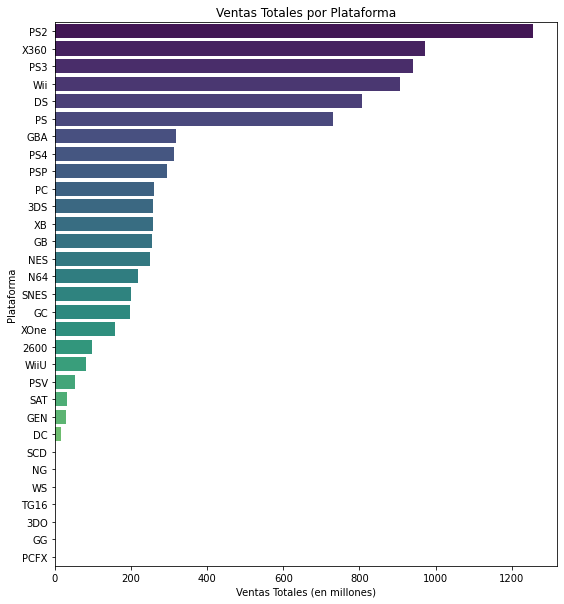

In [9]:
# Filtrar el DataFrame por plataforma y Ventas totales
# Ordenar del más al menos vendido
# Mostrar solo las 10 más vendidas



#  pts = Platform Total Sales

pts = games.groupby("platform")["total_sales"].sum()
pts = pts.sort_values(ascending = False)
pts = pts.head(32)



# Gráfico de barras para los datos de ventas totales por plataforma
plt.figure(figsize=(9, 10))
sns.barplot(
            x=pts.values, 
            y=pts.index, 
            palette='viridis'
           )

# Configurar el título y etiquetas
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()



 <font color='#FFB000'> __Comentarios:__
<font color='#000000'>
    
>Plataformas Top:
>
>- PS2    
>- X360     
>- PS3      
>- Wii      
>- DS       
>- PS    
>
>Esta subsección aborda la variación de ventas entre plataformas, enfocándose en identificar y analizar aquellas con las mayores ventas totales. La construcción de una distribución basada en datos anuales proporcionará una representación visual de las tendencias a lo largo del tiempo, lo que puede ayudar a identificar patrones y cambios significativos.

#### <font color='#FFB000'> Plataformas que solían ser populares pero que ahora no tienen ventas.<a id='3.2.1'></a>

[Volver a Contenidos](#back)    
>A partir de este punto solo nos enfocaremos en las tres marcas más destacadas:
>- Xbox 
>- Playstation
>- Nintendo
>
>Ya que, Incluir todas las plataformas podría aumentar la complejidad del análisis y dificultar la interpretación de los resultados.


In [10]:
# Filtrar el DataFrame por las plataformas top

# Crear máscara
plataformas_top = [
                   'PS2', 
                   'X360', 
                   'PS3', 
                   'Wii', 
                   'DS', 
                   'PS'
                  ]
df_top = games[games['platform'].isin(plataformas_top)]



#    Filtrar valores inusuales en el año de lanzamiento, recordemos que al inicio 
#       "year_of_release" tenía 269 valores nulos, los cuales se sustituyeron por 0

df_top =df_top[df_top['year_of_release'] > 0]


# Revisar que los años de vida sean los correctos

print("El año más antiguo es:",
      df_top["year_of_release"].min())

print("El año más reciente es:",
      df_top["year_of_release"].max())

El año más antiguo es: 1985.0
El año más reciente es: 2016.0


In [11]:
# Averiguar qué juego salio en 1985 y en qué plataforma

a = df_top.query("year_of_release == 1985")[{"platform","name"}]
a

,name,platform
15957,Strongest Tokyo University Shogi DS,DS


<font color='#FFB000'> **Comentario:**
<font color='#000000'>
>Strongest Tokyo University Shogi DS salió a la venta en 2007

In [12]:
# Arreglar este problema en el DF original y en df_top


#      En el DataFrame original

games.loc[15957, "year_of_release"] = 2007

#      En df_top

df_top.loc[15957, "year_of_release"] = 2007


#      Revisar que los años de vida sean los correctos

print("El año más antiguo es:",df_top["year_of_release"].min())
print("El año más reciente es:",df_top["year_of_release"].max())


El año más antiguo es: 1994.0
El año más reciente es: 2016.0


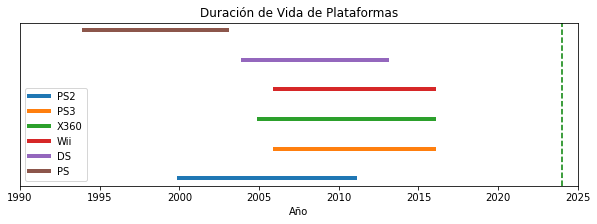

In [13]:
 
# Crear una lista de plataformas y sus años de inicio y fin
platforms = [
             "PS2", 
             "PS3", 
             "X360",
             "Wii",
             "DS",
             "PS"
            ]

life = {
         "PS2": (2000, 2011),
        "X360": (2005, 2016),
         "PS3": (2006, 2016),
         "Wii": (2006,2016),
         "DS" : (2004,2013),
         "PS" : (1994,2003)
}


# Crear un gráfico de segmentos de línea para representar la duración de vida de cada plataforma
plt.figure(figsize=(10, 3))
for platform in platforms:
    start, end = life[platform]
    plt.plot(
             [start, end], 
             [platform, platform], 
             linewidth=4, 
             label=platform
            )

    
# Estilizar el gráfico
plt.title('Duración de Vida de Plataformas')
plt.xlabel('Año')
plt.yticks([])  # Ocultar etiquetas del eje y (plataformas)
plt.xticks(range(1990, 2030, 5))
plt.legend()
current_year = 2024  # Año actual
plt.axvline(
            x=current_year, 
            color='green', 
            linestyle='--', 
            label=f'Año Actual: {current_year}'
           )

# Mostrar el gráfico
plt.show()


<font color='#FFB000'> __Comentario:__
<font color='#000000'>
>- Podemos observar que en promedio cada plataforma tiene una vida de 10 años.
>- Número de entradas en el DataFramae 9,962, esto representa 55.41% del total de entradas
>- Estas 5 plataformas son las más populares y ninguna de ellas hoy en día tiene ventas

#### <font color='#FFB000'> ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?<a id='3.2.2'></a>
    
[Volver a Contenidos](#back)    

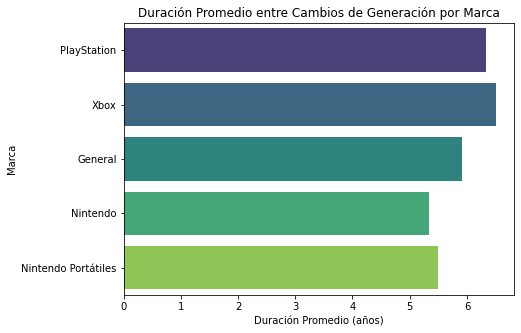

In [14]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer?



#  Marcas de plataformas Top:
#                             - Playstation
#                             - Xbox
#                             - Nintendo

marcas_top = ['PS',
              'PS2',
              'PS3',
              'PS4',
              'XB',
              'X360',
              'XOne',
              'N64',
              'GC',
              'Wii',
              'WiiU',
              'GBA',
              'DS',
              '3DS'
             ]
brand_top = games[games['platform'].isin(marcas_top)]



#   Filtrar valores inusuales en el año de lanzamiento, recordemos que al inicio 
#   "year_of_release" tenía 269 valores nulos, los cuales se sustituyeron por 0

brand_top =brand_top[brand_top['year_of_release'] > 0]




#   Playstation   -   3  cambios de generación 
PS1 = brand_top.query("platform == 'PS'")["year_of_release"].min() 
PS4 = brand_top.query("platform == 'PS4'")["year_of_release"].min() 

playstation_avg = (PS4-PS1)/3



#    Xbox   -   2  cambios de generación
XB = brand_top.query("platform == 'XB'")["year_of_release"].min() 
XOne = brand_top.query("platform == 'XOne'")["year_of_release"].min() 

xbox_avg = (XOne - XB)/2




#    Nintendo  -   3 cambios de generación
N64 = brand_top.query("platform == 'N64'")["year_of_release"].min() 
WiiU = brand_top.query("platform == 'WiiU'")["year_of_release"].min() 

nintendo_avg = (WiiU - N64)/3



#    Nintendo Portátiles  -  2 cambios de generación
GBA = brand_top.query("platform == 'GBA'")["year_of_release"].min() 
DS3 = brand_top.query("platform == '3DS'")["year_of_release"].min()


nintendo_port_avg = (DS3-GBA)/2




# Promedio general

avg = (playstation_avg
      + xbox_avg
      + nintendo_avg
      + nintendo_port_avg
      )/4




# Mostrar resultados

# Datos para las marcas y sus duraciones promedio
marcas = [
         'PlayStation', 
          'Xbox', 
          'General', 
          'Nintendo', 
          'Nintendo Portátiles'
         ]

duraciones_promedio = [
                       playstation_avg, 
                       xbox_avg, 
                       avg, 
                       nintendo_avg, 
                       nintendo_port_avg
                      ]


# Colores específicos para cada marca usando "viridis"
colores = sns.color_palette(
                           "viridis", 
                            n_colors=len(marcas)
                           )

# Crear un gráfico de barras horizontal con Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(
            x=duraciones_promedio, 
            y=marcas, 
            palette=colores
           )

plt.title('Duración Promedio entre Cambios de Generación por Marca')
plt.xlabel('Duración Promedio (años)')
plt.ylabel('Marca')

# Mostrar el gráfico
plt.show()


<font color='#FFB000'>__Comentario:__
<font color='#000000'>

>En promedio cada 7 años sale una nueva generación de plataformas

 ##### <font color='#FFB000'>__¿Cuánto tardan las plataformas en desaparecer?__
    
[Volver a Contenidos](#back)    

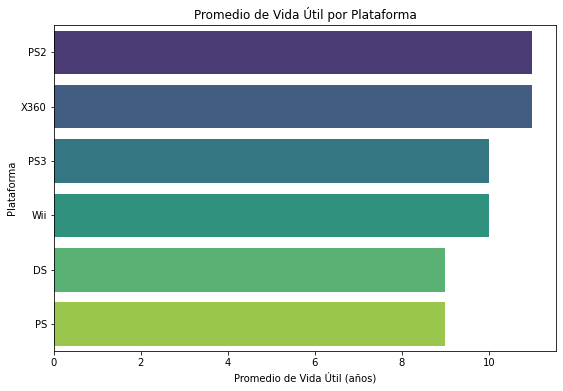

In [15]:
# ¿Cuánto tardan las plataformas en desaparecer?


# Retomando de 3.2.1    
# df_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']



# Obtener el primer y último año de lanzamiento para cada plataforma
def calcular_promedio_vida_util(df):
    vida_util = (
                 df.groupby("platform")['year_of_release'].max() 
               - df.groupby("platform")['year_of_release'].min()
                )
    return vida_util



# Imprimir el resultado
vida_util = calcular_promedio_vida_util(df_top)
vida_util = vida_util.sort_values(ascending = False)




# Crear un gráfico de barras horizontal con Seaborn y paleta "viridis"
plt.figure(figsize=(9, 6))
sns.barplot(
            x=vida_util.values, 
            y=vida_util.index, 
            palette='viridis'
           )

plt.title('Promedio de Vida Útil por Plataforma')
plt.xlabel('Promedio de Vida Útil (años)')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()

<font color='#FFB000'>__Comentario:__
<font color='#000000'>
>- En promedio una plataforma de estas 3 marcas tiene una vida útil de 10 años.
>- Dependiendo de la popularidad de una plataforma puede tener una vida más larga.
>- Este resultado concuerda con la gráfica del punto 3.2.1 **"Plataformas que solían ser populares pero que ahora no tienen ventas."** 

### <font color='#FFB000'>Construcción de un modelo para 2017<a id='3.3'></a>

>**Criterios**
>- Se tomaran datos desde 2011 para las plataformas principales: 
>    - Playstation con PS4
>    - Xbox con XOne 
>    - Nintendo con WiiU y 3DS
>- Dicho criterio abarca solo la última generación.
>- Tomar en cuenta que 2015 sería el 2do año para la última generación.

[Volver a Contenidos](#back)    

In [16]:
# Filtrado de datos desde el 2011



#     Filtrar datos para plataformas de estudio
mascara =[
          'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 
          'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 
          'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 
          'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'
          ]
nuevo_df = games[games['platform'].isin(mascara)]


#     Filtrar datos a partir de 2011
nuevo_df =nuevo_df[nuevo_df['year_of_release'] > 2010]



#### <font color='#FFB000'>¿Qué plataformas son líderes en ventas?<a id='3.3.1'></a>
    
[Volver a Contenidos](#back)    

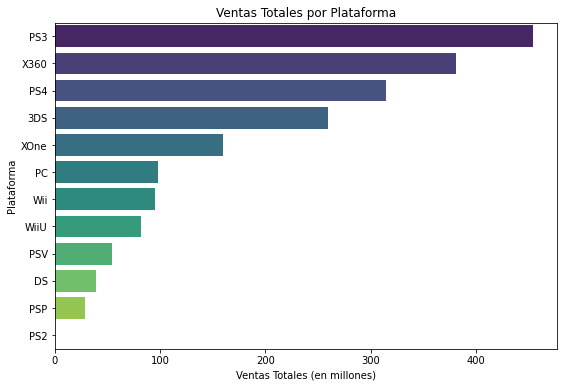

In [17]:
# Identificar Plataformas Líderes:

# - Analizar las ventas globales por plataforma y determina cuáles son 
#   plataformas las líderes.
# - Identifica plataformas que están experimentando un crecimiento y 
#   las que muestran una disminución en las ventas.





# - Analizar las ventas globales por plataforma y determina cuáles son 
#   plataformas las líderes.

global_sales = nuevo_df.groupby("platform")["total_sales"].sum()
global_sales = global_sales.sort_values(ascending = False)
global_sales


# Crear un gráfico de barras para los datos de ventas totales por plataforma
plt.figure(figsize=(9, 6))
sns.barplot(
            x=global_sales.values, 
            y=global_sales.index, 
            palette='viridis'
           )

# Configurar el título y etiquetas
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()



<font color='#FFB000'>__Comentario:__
<font color='#000000'>
>Desde el año 2011 hasta el comienzo del 2016 las plataformas líderes en ventas fueron PS3, Xbox 360, PS4, 3DS y Xbox One

#### <font color='#FFB000'>¿Cuáles crecen y cuáles se reducen?<a id='3.3.2'></a>
    
[Volver a Contenidos](#back)    

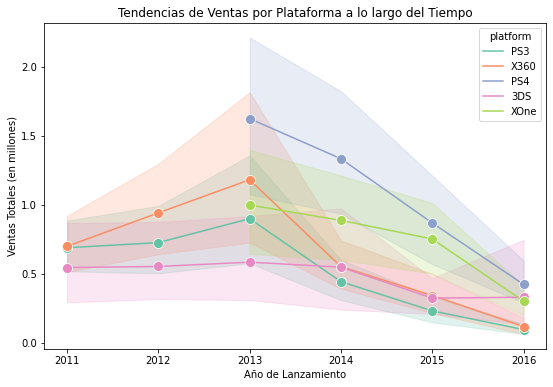

In [18]:
#  Crear un gráfico de líneas para mostrar las tendencias de ventas 
#  a lo largo del tiempo


#     Filtrar datos para plataformas de estudio
mascara_2 =[
          'PS3', 'X360', 'PS4', '3DS','XOne'
          ]
platforms_pop = games[games['platform'].isin(mascara_2)]


#     Filtrar datos a partir de 2011
platforms_pop =platforms_pop[platforms_pop['year_of_release'] > 2010]





plt.figure(figsize=(9, 6))
sns.lineplot(
             x="year_of_release", 
             y="total_sales", 
             hue="platform", 
             data=platforms_pop, 
             marker='o', 
             markersize=10, 
             palette='Set2'
            )


# Configurar el título y etiquetas
plt.title('Tendencias de Ventas por Plataforma a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar el gráfico
plt.show()


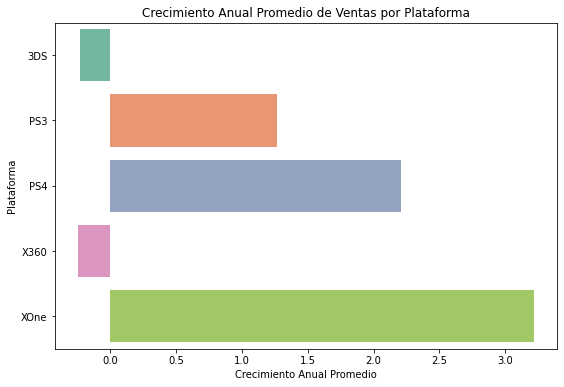

In [19]:
# Calcular el crecimiento anual promedio por plataforma
annual_growth = platforms_pop.groupby(['platform', 'year_of_release'])['total_sales'].sum()
annual_growth = annual_growth.pct_change().mean(level=0)


# Crear un gráfico de barras para mostrar el crecimiento anual promedio por plataforma
plt.figure(figsize=(9, 6))
sns.barplot(
            x=annual_growth.values, 
            y=annual_growth.index, 
            palette='Set2'
           )


# Configurar el título y etiquetas
plt.title('Crecimiento Anual Promedio de Ventas por Plataforma')
plt.xlabel('Crecimiento Anual Promedio')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()


<font color='#FFB000'>__Comentario:__
><font color='#000000'>
>En el primer gráfico de líneas las tendencias de ventas a lo largo del tiempo por plataforma, se observa una tendencia a la baja en todas las plataformas. Esto indicaba que, en términos generales, las ventas disminuyeron con el tiempo para todas las plataformas.
>
>En el segundo gráfico de barras, se calculó el crecimiento anual promedio por plataforma. Aquí, el crecimiento anual promedio no necesariamente indica que las ventas absolutas estén aumentando, sino que mide cómo varía el crecimiento de las ventas de un año a otro en promedio. 
>
>Si bien es posible que las ventas totales estén disminuyendo, el crecimiento anual promedio podría ser positivo si la tasa de disminución es menor que la tasa de crecimiento en otros momentos.
>
>Entonces, ambas observaciones pueden ser ciertas:
>
>- Las ventas totales pueden mostrar una tendencia a la baja.
>- El crecimiento anual promedio puede ser positivo, indicando que, en promedio, hay cierto crecimiento en las ventas de un año a otro.
>
>**Factores**
>
>Número de Títulos Lanzados:
La disponibilidad de nuevos títulos puede afectar el atractivo y las ventas de una plataforma.

#### <font color='#FFB000'>Diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma<a id='3.3.3'></a>

    
[Volver a Contenidos](#back)    

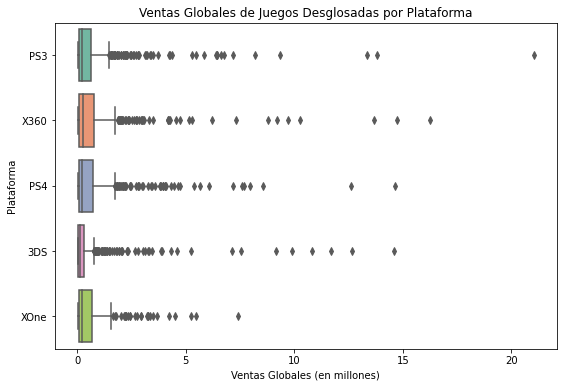

In [20]:
# Crear un diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(9, 6))
sns.boxplot(
            x='total_sales', 
            y='platform', 
            data=platforms_pop, 
            palette='Set2'
           )

# Configurar el título y etiquetas
plt.title('Ventas Globales de Juegos Desglosadas por Plataforma')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()

##### <font color='#FFB000'>¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? <a id='3.3.3.1'></a>
    
[Volver a Contenidos](#back)    
>
>- De acuerdo a 3.3.1 "¿Qué plataformas son líderes en ventas?" en ventas totales la diferencia entre Playstation 4 y Xbox One son de 2 a 1 respectivamente, sin embargo, ambas plataformas exprimentan ventas promedio. Asimismo Plsyatation 3 y Xbox 360 presentan ventas totales con una ligera ventaja para Playstation sin embargo en ventas promedio Xbox 360 tiene ventaja, sin embargo, PS, tiene algunos juegos con ventas atípicas importantes. Podemos concluir dos cosas:
>    - Las ventas promedio son similares porque son juegos que ambas plataformas comparten
>    - Los valores atípicos se deben a los juegos exclusivos de cada plataforma.
>    - Los juegos para la 3DS entonces son en su mayoría exclusivos.

#### <font color='#FFB000'> Gráfico de dispersión y correlación entre las reseñas y las ventas  -  Solución gráfica y analítica<a id='3.3.4'></a>
    
[Volver a Contenidos](#back)    


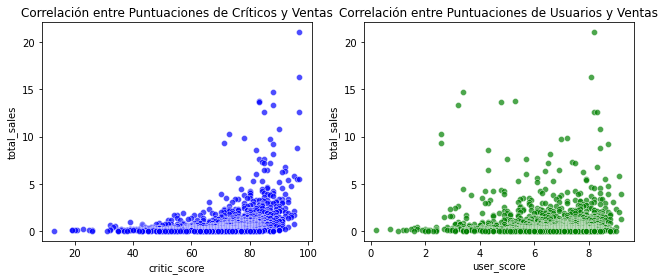

In [21]:
# Solución gráfica
# Se usará  seaborn.scatterplot



# Crear un gráfico de dispersión y calcular la correlación
plt.figure(figsize=(9, 4))


# Gráfico de dispersión para puntuaciones de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(
                x='critic_score', 
                y='total_sales',
                data=platforms_pop, 
                color='blue', 
                alpha=0.7
               )
plt.title('Correlación entre Puntuaciones de Críticos y Ventas')


# Gráfico de dispersión para puntuaciones de usuarios
plt.subplot(1, 2, 2)
sns.scatterplot(
                x='user_score', 
                y='total_sales', 
                data=platforms_pop, 
                color='green', 
                alpha=0.7
               )

plt.title('Correlación entre Puntuaciones de Usuarios y Ventas')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
# Solución analítica



# Calcular la correlación entre puntuaciones de críticos y ventas
correlation_critic = platforms_pop['critic_score'].corr(platforms_pop['total_sales'])

# Calcular la correlación entre puntuaciones de usuarios y ventas
correlation_user = platforms_pop['user_score'].corr(platforms_pop['total_sales'])

print(f"Correlación entre Puntuaciones de Críticos y Ventas: {correlation_critic}")
print(f"Correlación entre Puntuaciones de Usuarios y Ventas: {correlation_user}")

Correlación entre Puntuaciones de Críticos y Ventas: 0.380091345896269
Correlación entre Puntuaciones de Usuarios y Ventas: 0.029311883764173565


 <font color='#FFB000'>__Comentario:__
<font color='#000000'>
>- La correlación entre puntuaciones de críticos y ventas es aproximadamente 0.3
>- La correlación entre puntuaciones de usuarios y ventas es aproximadamente 0.029
>- Según estos resultados, no podemos afirmar que las puntuaciones de críticos o usuarios tengan una correlación fuerte con las ventas. Pueden haber otros factores o variables que también influyan en el rendimiento de ventas de los videojuegos.

#### <font color='#FFB000'>Comparación de los mismos juegos entre plataformas<a id='3.3.5'></a>
><font color='#FFB000'>__Comentarios al final de 3.3.5__

##### <font color='#FFB000'>Número de juegos por cada plataforma y juegos compartidos <a id='3.3.5.1'></a>
    
[Volver a Contenidos](#back)    

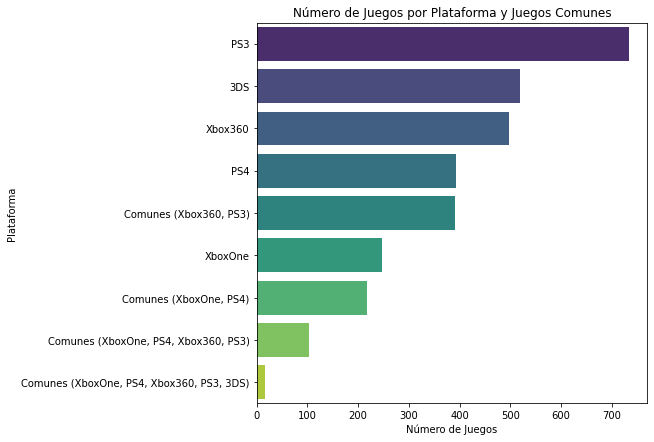

In [23]:
# Filtrar los juegos por plataforma
# Mediante Merge fusionamos las Series dónde sean iguales
# Retomando el DataFrame creado en 3.3.2   " platforms_pop "



#     Filtrar datos para plataformas de estudio

XboxOne = platforms_pop.query("platform == 'XOne'")[[
                                                     "name", 
                                                     "total_sales", 
                                                     "genre"
                                                   ]]

PS4 = platforms_pop.query("platform == 'PS4'")[[
                                                 "name", 
                                                 "total_sales",
                                                 "genre"
                                              ]]

PS3 = platforms_pop.query("platform == 'PS3'")[[
                                                "name", 
                                                "total_sales",
                                                "genre"
                                               ]]

Xbox360 = platforms_pop.query("platform == 'X360'")[[
                                                     "name", 
                                                     "total_sales",
                                                     "genre"
                                                    ]]

_3DS = platforms_pop.query("platform == '3DS'")[[
                                                 "name", 
                                                 "total_sales",
                                                 "genre"
                                               ]]

WiiU = platforms_pop.query("platform == 'WiiU'")[[
                                                 "name", 
                                                 "total_sales",
                                                 "genre"
                                                ]]



# Nuevas series
xboxone_sales = XboxOne
xbox360_sales = Xbox360
ps4_sales = PS4
ps3_sales = PS3
_3ds_sales = _3DS
wiiu_sales = WiiU


# Fusionar las Series
common_games_xbox_ps4      = pd.merge(
                                      xboxone_sales, 
                                      ps4_sales, 
                                      on=["name","genre"], 
                                      how="inner", 
                                      suffixes=['_XOne', '_PS4']
                                     )

common_games_xboxone_360_ps4 = pd.merge(
                                      common_games_xbox_ps4, 
                                      xbox360_sales, 
                                      on=["name","genre"], 
                                      how="inner", 
                                      suffixes=['_x', '_Xbox360']
                                     )

common_games_xboxone_360_ps_4_3 = pd.merge(
                                      common_games_xboxone_360_ps4, 
                                      ps3_sales, 
                                      on=["name","genre"], 
                                      how="inner", 
                                      suffixes=['_x', '_PS3']
                                     )

common_games_xbox360_ps3 = pd.merge(
                                      xbox360_sales, 
                                      ps3_sales, 
                                      on=["name","genre"], 
                                      how="inner", 
                                      suffixes=['_Xbox360', '_PS3']
                                     )

common_games               = pd.merge(
                                      common_games_xboxone_360_ps_4_3, 
                                      _3ds_sales, 
                                      on=["name","genre"], 
                                      how="inner", 
                                      suffixes=['_x', '_3DS']
                                     )





# Gráfico que representa el número de juegos por plataforma y 
# los juegos compartidos


#     Crear máscara para el gráfico
platforms = [
             'PS3',
             '3DS',
             'Xbox360',
             'PS4',
             'Comunes (Xbox360, PS3)',
             'XboxOne', 
             'Comunes (XboxOne, PS4)', 
             'Comunes (XboxOne, PS4, Xbox360, PS3)',
             'Comunes (XboxOne, PS4, Xbox360, PS3, 3DS)'
            ]

num_games = [
             len(PS3),
             len(_3DS),
             len(Xbox360),
             len(PS4), 
             len(common_games_xbox360_ps3),
             len(XboxOne),
             len(common_games_xbox_ps4), 
             len(common_games_xboxone_360_ps_4_3),
             len(common_games)
            ]



#     Crear un gráfico de barras horizontales
plt.figure(figsize=(7, 7))

#     Barras para el número de juegos por plataforma y comunes entre ellas
sns.barplot(
            x=num_games, 
            y=platforms, 
            palette='viridis'
           )

#     Configurar el título y etiquetas
plt.title('Número de Juegos por Plataforma y Juegos Comunes')
plt.xlabel('Número de Juegos')
plt.ylabel('Plataforma')

#     Mostrar el gráfico
plt.show()



##### <font color='#FFB000'>Ventas totales de juegos por cada plataforma y juegos compartidos<a id='3.3.5.2'></a>
 
[Volver a Contenidos](#back)    
<font color='#FFB000'> __Xbox One  vs  Playstation 4__

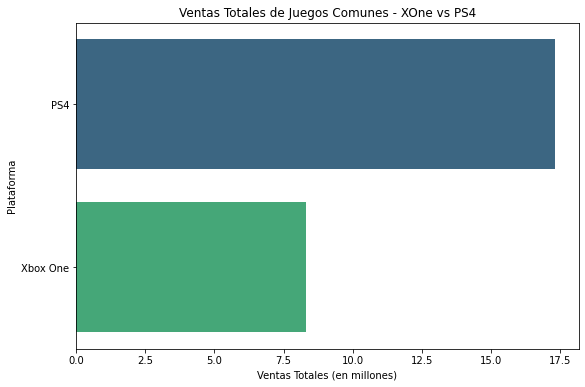

In [24]:
# Xbox One  vs  Playstation 4


# Sumar las ventas totales por plataforma
total_sales_xone = common_games["total_sales_XOne"].sum()
total_sales_ps4 = common_games["total_sales_PS4"].sum()



# Crear un DataFrame para las barras
bar_data = pd.DataFrame({
    "Platform": [ 
                 "PS4",
                 "Xbox One",
                ],
    
    "Total Sales": [
                    total_sales_ps4, 
                    total_sales_xone
                   ]
})


# Crear la gráfica de barras horizontales
plt.figure(figsize=(9, 6))
sns.barplot(
            x="Total Sales", 
            y="Platform", 
            data=bar_data, 
            palette='viridis'
           )

plt.title('Ventas Totales de Juegos Comunes - XOne vs PS4')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Plataforma')
plt.show()

<font color='#FFB000'> __Xbox 360  vs  Playstation 3__
    
[Volver a Contenidos](#back)    

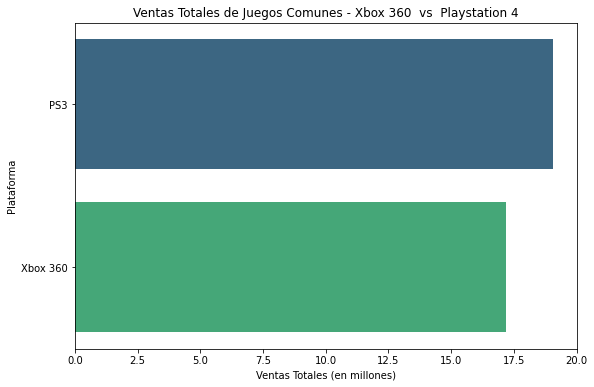

In [25]:
# Xbox 360  vs  Playstation 3


# Sumar las ventas totales por plataforma
total_sales_xbox360 = common_games["total_sales_x"].sum()
total_sales_ps3 = common_games["total_sales_PS3"].sum()


# Crear un DataFrame para las barras
bar_data = pd.DataFrame({
    "Platform": [ 
                 "PS3",
                 "Xbox 360",
                ],
    
    "Total Sales": [
                    total_sales_ps3,
                    total_sales_xbox360,  
                   ]
})


# Crear la gráfica de barras horizontales
plt.figure(figsize=(9, 6))
sns.barplot(x="Total Sales", 
            y="Platform", 
            data=bar_data, 
            palette='viridis')

plt.title('Ventas Totales de Juegos Comunes - Xbox 360  vs  Playstation 4')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Plataforma')
plt.show()

<font color='#FFB000'>__Xbox One  vs  Playstation 4  vs Xbox360 vs Playstation 3 vs 3DS__
    
[Volver a Contenidos](#back)    

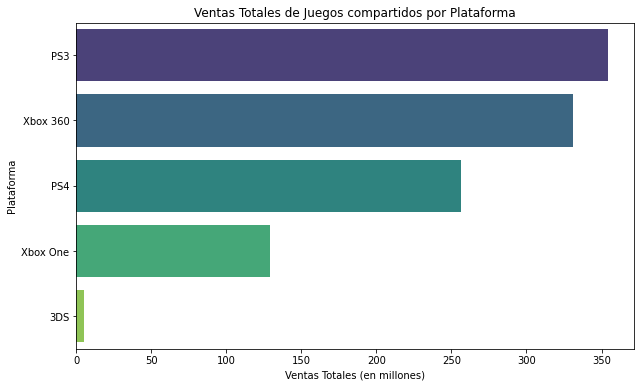

In [26]:
# Xbox One  vs  Playstation 4  vs Xbox 360 vs vs Playstation 3 vs 3DS


# Definir las variables de ventas totales
total_sales_xone = 129.36
total_sales_ps4 = 256.35
total_sales_xbox360 = 330.81
total_sales_ps3 = 354.16
total_sales_3DS = 5.11  # Este valor es total_sales_3DS = common_games["total_sales"].sum()

# Crear un DataFrame para las ventas totales
sales_data = {
    "Plataforma": ["PS3",
                   "Xbox 360",
                   "PS4", 
                   "Xbox One", 
                   "3DS"],
    
    "Ventas Totales (en millones)": [total_sales_ps3,
                                     total_sales_xbox360,
                                     total_sales_ps4, 
                                     total_sales_xone, 
                                     total_sales_3DS]
}

sales_df = pd.DataFrame(sales_data)

# Crear un gráfico de barras horizontales con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Ventas Totales (en millones)", y="Plataforma", data=sales_df, palette='viridis')

# Configurar el título y etiquetas
plt.title('Ventas Totales de Juegos compartidos por Plataforma')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Plataforma')

# Mostrar el gráfico
plt.show()


In [27]:
#len(common_games_xbox360_ps3),
 #            len(XboxOne),
  #           len(common_games_xbox_ps4), 
   #          len(common_games_xboxone_360_ps_4_3),
    #         len(common_games)


print(common_games_xboxone_360_ps_4_3["name"].nunique())

103


<font color='#FFB000'>__Comentario:__
<font color='#000000'>
Desde el 2011 juegos lanzados por pñataforma:


|Plataforma|Títulos|
|----------|-------|
|PS4       |  392  |
|Xbox One  |  247  |
|Xbox 360  |  498  |
|PS3       |  732  |    
|WiiU      |  147  |
|3DS       |  512  |

***


> Juegos compartidos Xbox One y PS4:  <mark> 217 <mark> desde el 2011
      > - PS4:  55.3% son compartidos  
      > - Xbox One: 87.8 % son compartidos

***

> Juegos compartidos Xbox 360 y PS3:   Juego compartidos <mark>390<mark> desde el 2011
    > - Xbox 360: 78.3%
    > - PS3: 53.27%

***
> Juegos compartidos Xbox One, PS4, Xbox 360 y PS3:   Juego compartidos <mark>103<mark> desde el 2011  
    
    > - Xbox 360: 20.60%
    > - PS3: 26.27.27%
    > - Xbox One: 41.7%
    > - PS3:14.07%
***
    
> Juegos compartidos Xbox One, PS4, Xbos 360, PS3 y 3DS: <mark>16 desde el 2011<mark>
    > - 3DS: 3.1%
 
***
    
>* Esto proporciona una visión detallada de la intersección de títulos entre las plataformas, destacando la popularidad y la diversidad de juegos compartidos, siendo Plasyatation la plataforma más popular. 
*También destaca la concentración de títulos compartidos entre Xbox y Playstation, lo cual puede ser un indicador interesante para entender las preferencias de los desarrolladores y los jugadores en estas plataformas.
*Este patrón también sugiere que la verdadera competencia se encuentra entre PlayStation y XBOX, con Nintendo adoptando una estrategia diferente al centrarse en lanzar títulos exclusivos de manera más selectiva.

#### <font color='#FFB000'>Distribución general de los juegos por género.<a id='3.3.6'></a>

[Volver a Contenidos](#back)    
    
<font color='#FFB000'>**Comentario**
<font color='#000000'>
>De acuero a los resultados obtenidos en este punto debemos hacer un cambio en el análisis:
>- Playstation y Xbox
>- Nintendo
    
<font color='#FFB000'> __Xbox One y PS4__

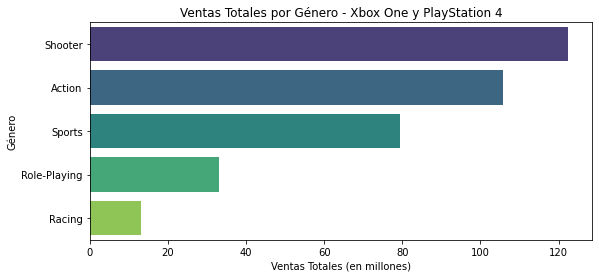

In [28]:
# Filtrando los juegos por género y total de ingresos
common_games_xbox_ps4["sales"] = (
                                  common_games_xbox_ps4["total_sales_XOne"]
                                + common_games_xbox_ps4["total_sales_PS4"]
               
                                 )



# Agrupando por género y sumando las ventas totales
genre_XP = common_games_xbox_ps4.groupby("genre")["sales"].sum().reset_index()


# Ordenar las filas por ventas de mayor a menor
genre_XP = genre_XP.sort_values(
                                by="sales", 
                                ascending=False
                               )


# Crear la gráfica de barras
plt.figure(figsize=(9, 4))
sns.barplot(
            x="sales", 
            y="genre", 
            data=genre_XP.head(), 
            palette='viridis'
           )


# Configuración del título y etiquetas
plt.title('Ventas Totales por Género - Xbox One y PlayStation 4')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

<font color='#FFB000'> __Xbox 360 y PS3__
    
[Volver a Contenidos](#back)    

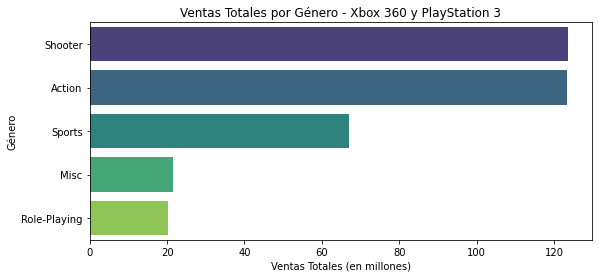

In [29]:
# Filtrando los juegos por género y total de ingresos
common_games_xbox360_ps3["sales"] = (
                                  common_games_xbox_ps4["total_sales_XOne"]
                                + common_games_xbox_ps4["total_sales_PS4"]
               
                                 )



# Agrupando por género y sumando las ventas totales
genre_XP2 = common_games_xbox360_ps3.groupby("genre")["sales"].sum().reset_index()


# Ordenar las filas por ventas de mayor a menor
genre_XP2 = genre_XP2.sort_values(
                                by="sales", 
                                ascending=False
                               )


# Crear la gráfica de barras
plt.figure(figsize=(9, 4))
sns.barplot(
            x="sales", 
            y="genre", 
            data=genre_XP2.head(), 
            palette='viridis'
           )


# Configuración del título y etiquetas
plt.title('Ventas Totales por Género - Xbox 360 y PlayStation 3')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

<font color='#FFB000'> __Nintendo__
<font color='#000000'>    
Debido a que nintendo 3DS no comparte la mayoría de su catalogo con Xbox y playstation veamos que generos son los más populares en la plataforma de manera particular
    
[Volver a Contenidos](#back)

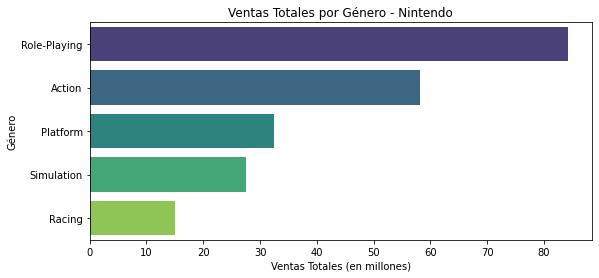

In [30]:
# Agrupando por género y sumando las ventas totales
genre_Nintendo = _3DS.groupby("genre")["total_sales"].sum().reset_index()


# Ordenar las filas por ventas de mayor a menor
genre_Nintendo = genre_Nintendo.sort_values(by="total_sales", 
                                            ascending=False)


# Crear la gráfica de barras
plt.figure(figsize=(9, 4))
sns.barplot(
            x="total_sales", 
            y="genre", 
            data=genre_Nintendo.head(), 
            palette='viridis'
           )


# Configuración del título y etiquetas
plt.title('Ventas Totales por Género - Nintendo')
plt.xlabel('Ventas Totales (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

<font color='#FFB000'>__Comentario__
<font color='#000000'>
>**¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**
>
>Tabla de las preferencias XBOX y PS4   vs   Nintendo
>
|  Xbox ONe y PS4 |Xbox 360 y PS3|  Nintendo  |
|-----------------|--------------|----------  |
|Shooter          |Shooter       |Role-Playing|
|Action           |Action        |Action      |
|Sports           |Sports        |Platform    |
|Role-Playing     |Misc          |Simulation  |
|Racing           |Role-Playing  |Racing      |
>
>***
> 
> En la categoría de **Shooter**, XOne y PS4 muestran preferencia por juegos de disparos, mientras que Nintendo se inclina hacia juegos de **Rol y acción**.
> Los usuarios de Xbox y Playstation tienen en común el gusto por los juegos de __Shooter, Acción y Deportes__
> 
>- XBOX, PS4 y Nintendo, comparten la preferencia por juegos de **Action**.
>
>- En cuanto a la categoría de **Sports**, XBOX y PS4 tienen una inclinación hacia este género, mientras que Nintendo prefiere juegos de **Platform**.
>
>- Ambas plataformas comparten el interés por juegos de **Role-Playing**.
>
>- La categoría de **Racing** es apreciada tanto por XBOX y PS4 como por Nintendo.
>
>Estos resultados ofrecen una visión de las preferencias de géneros de juegos entre las plataformas XBOX, PS4 y Nintendo, resaltando similitudes y diferencias en sus elecciones de géneros. 
>
>***
>
>Diferencia clave:
>
>Mientras XBOX y Playstation prefieren los juegos de deportes, acción y disparos Nintendo opta por los juegos de Rol.

## <font color='#2D9596'>  Perfil del usuario por cada región<a id='4'></a>
<font color='#2D9596'>
    
[Volver a Contenidos](#back) 
    
>- 4.1 Las cinco plataformas principales. Descripción de las variaciones en la cuotas de mercado de una región a otra.
>    - 4.1.1 Unión Europea
>    - 4.1.2 Norte América
>    - 4.1.3 Japón
>    - 4.1.4 Otras Regiones
>- 4.2 Los cinco géneros principales.
>    - 4.2.1 Unión Europea
>    - 4.2.2 Norte América
>    - 4.2.3 Japón
>    - 4.2.4 Otras Regiones
>- 4.3 ¿Las clasificaciones ESRB afectan a las ventas en las regiones individuales?
>    - 4.3.1 Unión Europea
>    - 4.3.2 Norte América
>    - 4.3.3 Japón
>    - 4.3.4 Otras Regiones
>
***    
>**Comentario**
>
>Las cinco plataformas principales son: 
>
>- PS2    
>- X360     
>- PS3      
>- Wii      
>- DS       

**DataFrame: <mark> <font color='#0B60B0'>df_top<mark>** de *3.2.1 Plataformas que solían ser populares pero que ahora no tienen ventas*.


### <font color='#2D9596'>Las cinco plataformas principales. Descripción de las variaciones en la cuotas de mercado de una región a otra.<a id='4.1'></a>
[Volver a Contenidos](#back)    
> <font color='#2D9596'>__Comentarios al final__
    
__Filtrar Datos__

In [31]:
# Filtrar los datos

# Playstation 2
# Filtrar datos solo para la plataforma PS2
PS2_data = df_top[df_top['platform'] == 'PS2']


# Xbox 360
# Filtrar datos solo para la plataforma Xbox 360
X360_data = df_top[df_top['platform'] == 'X360']


# Playstation 3
# Filtrar datos solo para la plataforma PS3
PS3_data = df_top[df_top['platform'] == 'PS3']


# Nintendo Wii
# Filtrar datos solo para la plataforma Wii
Wii_data = df_top[df_top['platform'] == 'Wii']


# Nintendo DS
# Filtrar datos solo para la plataforma DS
DS_data = df_top[df_top['platform'] == 'DS']



 #### <font color='#2D9596'> __Unión Europea__<a id='4.1.1'></a>
[Volver a Contenidos](#back)    

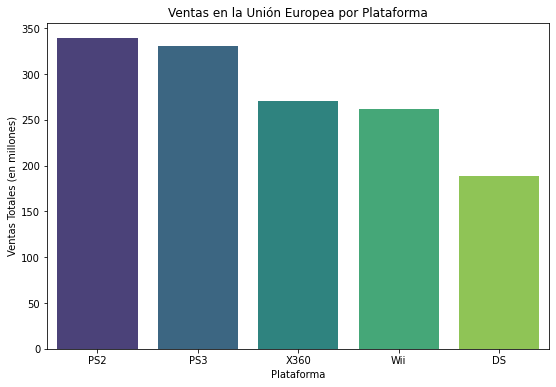

In [32]:
# Filtrado de datos
PS2_eu_sales = PS2_data['eu_sales'].sum()
X360_eu_sales = X360_data['eu_sales'].sum()
PS3_eu_sales = PS3_data['eu_sales'].sum()
Wii_eu_sales = Wii_data['eu_sales'].sum()
DS_eu_sales = DS_data['eu_sales'].sum()



# Crear un DataFrame para las ventas en la Unión Europea por plataforma
eu_sales_data = pd.DataFrame({
    'Plataforma': [
                   'PS2', 
                   'PS3', 
                   'X360', 
                   'Wii', 
                   'DS'
                  ],
    
    'Ventas en Unión Europea': [
                                PS2_eu_sales, 
                                PS3_eu_sales, 
                                X360_eu_sales, 
                                Wii_eu_sales, 
                                DS_eu_sales
                                ]
})


# Crear la gráfica de barras
plt.figure(figsize=(9, 6))
sns.barplot(
            x='Plataforma', 
            y='Ventas en Unión Europea', 
            data=eu_sales_data, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Ventas en la Unión Europea por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar la gráfica
plt.show()

#### <font color='#2D9596'> __Norte América__<a id='4.1.2'></a>
[Volver a Contenidos](#back)    

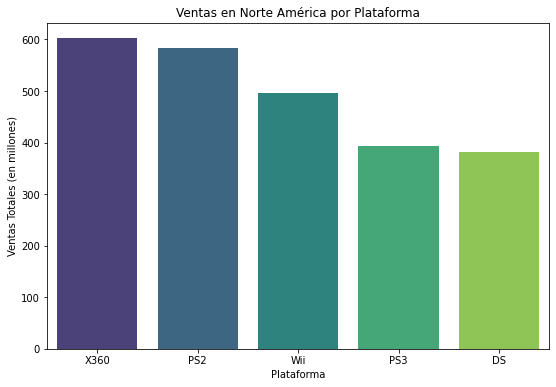

In [33]:
# Filtrado de datos
PS2_na_sales = PS2_data['na_sales'].sum()
X360_na_sales = X360_data['na_sales'].sum()
PS3_na_sales = PS3_data['na_sales'].sum()
Wii_na_sales = Wii_data['na_sales'].sum()
DS_na_sales = DS_data['na_sales'].sum()



# Crear un DataFrame para las ventas en la Unión Europea por plataforma
na_sales_data = pd.DataFrame({
    'Plataforma': [
                   'X360', 
                   'PS2', 
                   'Wii', 
                   'PS3', 
                   'DS'
                   ],
    
    'Ventas en Norte América': [
                                X360_na_sales, 
                                PS2_na_sales, 
                                Wii_na_sales, 
                                PS3_na_sales, 
                                DS_na_sales
                               ]
})


# Crear la gráfica de barras
plt.figure(figsize=(9, 6))
sns.barplot(
            x='Plataforma', 
            y='Ventas en Norte América', 
            data=na_sales_data, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Ventas en Norte América por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar la gráfica
plt.show()

#### <font color='#2D9596'>Japón<a id='4.1.3'></a>
[Volver a Contenidos](#back)    

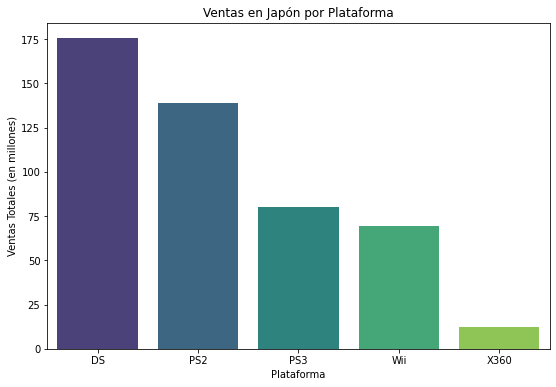

In [34]:
# Filtrado de datos
PS2_jp_sales = PS2_data['jp_sales'].sum()
X360_jp_sales = X360_data['jp_sales'].sum()
PS3_jp_sales = PS3_data['jp_sales'].sum()
Wii_jp_sales = Wii_data['jp_sales'].sum()
DS_jp_sales = DS_data['jp_sales'].sum()



# Crear un DataFrame para las ventas en la Unión Europea por plataforma
jp_sales_data = pd.DataFrame({
    'Plataforma': [
                   'DS', 
                   'PS2', 
                   'PS3', 
                   'Wii', 
                   'X360'
                  ],
     
    'Ventas en Japón': [
                        DS_jp_sales, 
                        PS2_jp_sales, 
                        PS3_jp_sales, 
                        Wii_jp_sales, 
                        X360_jp_sales
                       ]
})


# Crear la gráfica de barras
plt.figure(figsize=(9, 6))
sns.barplot(
            x='Plataforma', 
            y='Ventas en Japón', 
            data=jp_sales_data, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Ventas en Japón por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar la gráfica
plt.show()

#### <font color='#2D9596'>Otras Regiones<a id='4.1.4'></a>
[Volver a Contenidos](#back)   

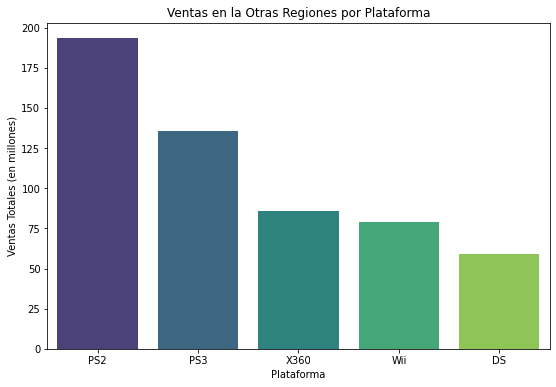

In [35]:
# Filtrado de datos
PS2_other_sales = PS2_data['other_sales'].sum()
X360_other_sales = X360_data['other_sales'].sum()
PS3_other_sales = PS3_data['other_sales'].sum()
Wii_other_sales = Wii_data['other_sales'].sum()
DS_other_sales = DS_data['other_sales'].sum()



# Crear un DataFrame para las ventas en la Unión Europea por plataforma
other_sales_data = pd.DataFrame({
    'Plataforma': [
                   'PS2',
                   'PS3',
                   'X360',  
                   'Wii', 
                   'DS'
                  ],
    
    'Ventas en Otras Regiones': [
                                 PS2_other_sales, 
                                 PS3_other_sales,
                                 X360_other_sales,  
                                 Wii_other_sales, 
                                 DS_other_sales
                                 ]
})

# Crear la gráfica de barras
plt.figure(figsize=(9, 6))
sns.barplot(
            x='Plataforma', 
            y='Ventas en Otras Regiones', 
            data=other_sales_data, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Ventas en la Otras Regiones por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar la gráfica
plt.show()

<font color='#2D9596'> __Comentario:__
>  **Unión Europea:** 
>
>1. La sexta y séptima generación de plataformas la dominó Playstation. 
>
>2. Además esta es la segunda región más importante.
>    
>  __Norte América:__ 
>
>1. Este es el mercado más codiciado por las marcas, realta el hecho de que X360 tenga ligera ventaja sobre la PS2.
>
>2. Por otro lado en la UE Playstation 3 tuvo una ventaja de 50 Millones mientras que en Norte América la diferecnia es de 200 Millones, es decir, cuatro veces más la diferencia. 
>   
>  __Japón:__ 
>
> 1. En esta región resalta la preferencia del público por plataformas portátiles, la Nintendo DS superó en ventas a la plataforma a PS2
>
> 2. Esta es la 3er región más importante.
>
> 3. Xbox 360 No es popular en esta región
>   
>  __Otras Regiones:__
>
> 1. En el resto de regiones al igual que en la Unión Europea la sexta y séptima generación se las llevo Playstation.

    

### <font color='#2D9596'> Los cinco géneros principales<a id='4.2'></a>
[Volver a Contenidos](#back)    
   
> <font color='#2D9596'>__Comentarios al final__

#### <font color='#2D9596'> Unión Europea<a id='4.2.1'></a>

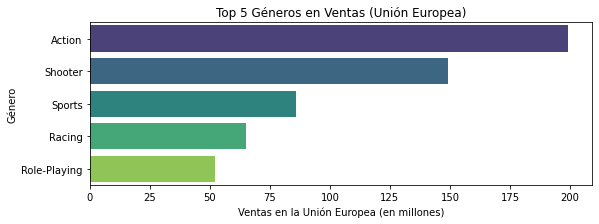

In [36]:
# Preparar los datos con las 5 plataformas principales
#     Filtrar datos para plataformas de estudio
mask =['PS3','PS3','X360','WiiU','3DS']
df_top_region = games[games['platform'].isin(mask)]
    
#     Filtrar datos
df_top_region =df_top_region[df_top_region['year_of_release'] > 0]





# Agrupar por género y sumar las ventas en la Unión Europea
ue_genre_top = df_top_region.groupby("genre")["eu_sales"].sum().reset_index()

# Ordenar por ventas en la Unión Europea de manera descendente
ue_genre_top = ue_genre_top.sort_values(by="eu_sales", 
                                        ascending=False)

# Obtener los cinco géneros principales
ue_genre_top = ue_genre_top.head()


# Crear la gráfica de barras
plt.figure(figsize=(9, 3))
sns.barplot(
            x='eu_sales', y='genre', 
            data=ue_genre_top, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Top 5 Géneros en Ventas (Unión Europea)')
plt.xlabel('Ventas en la Unión Europea (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()



#### <font color='#2D9596'> Norte América<a id='4.2.2'></a>
[Volver a Contenidos](#back)    

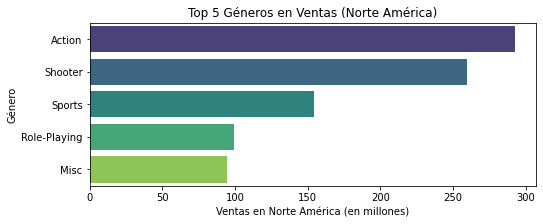

In [37]:
# Agrupar por género y sumar las ventas en Norte América
na_genre_top = df_top_region.groupby("genre")["na_sales"].sum().reset_index()


# Ordenar por ventas en Norte América de manera descendente
na_genre_top = na_genre_top.sort_values(by="na_sales", 
                                        ascending=False)

# Obtener los cinco géneros principales
na_genre_top = na_genre_top.head()


# Crear la gráfica de barras
plt.figure(figsize=(8, 3))
sns.barplot(
            x='na_sales', 
            y='genre', 
            data=na_genre_top, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Top 5 Géneros en Ventas (Norte América)')
plt.xlabel('Ventas en Norte América (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

####  <font color='#2D9596'> Japón<a id='4.2.3'></a>
[Volver a Contenidos](#back)    

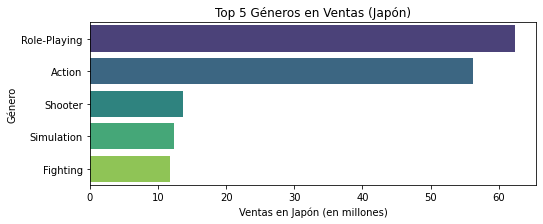

In [38]:
# Agrupar por género y sumar las ventas en Japón
jp_genre_top = df_top_region.groupby("genre")["jp_sales"].sum().reset_index()


# Ordenar por ventas en Japón de manera descendente
jp_genre_top = jp_genre_top.sort_values(by="jp_sales", 
                                        ascending=False)

# Obtener los cinco géneros principales
jp_genre_top = jp_genre_top.head()


# Crear la gráfica de barras
plt.figure(figsize=(8, 3))
sns.barplot(
            x='jp_sales', 
            y='genre', 
            data=jp_genre_top, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Top 5 Géneros en Ventas (Japón)')
plt.xlabel('Ventas en Japón (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

#### <font color='#2D9596'> Otras Regiones<a id='4.2.4'></a>
[Volver a Contenidos](#back)    

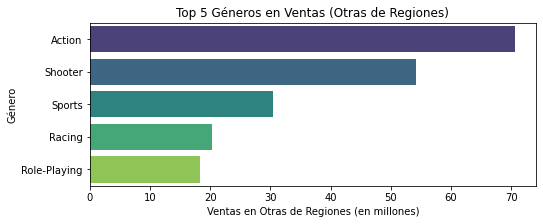

In [39]:
# Agrupar por género y sumar las ventas en Otras de Regiones
other_genre_top = df_top_region.groupby("genre")["other_sales"].sum().reset_index()


# Ordenar por ventas en Otras de Regiones de manera descendente
other_genre_top = other_genre_top.sort_values(by="other_sales", 
                                              ascending=False)


# Obtener los cinco géneros principales
other_genre_top = other_genre_top.head()


# Crear la gráfica de barras
plt.figure(figsize=(8, 3))
sns.barplot(
            x='other_sales', 
            y='genre', 
            data=other_genre_top, 
            palette='viridis'
           )

# Configuración del título y etiquetas
plt.title('Top 5 Géneros en Ventas (Otras de Regiones)')
plt.xlabel('Ventas en Otras de Regiones (en millones)')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

<font color='#2D9596'> __Comentario:__

>__Consistencia en Preferencias:__
> 1. La consistencia en las preferencias de géneros entre la Unión Europea, América del Norte y Otras Regiones sugiere que hay patrones similares de consumo de videojuegos en estas áreas geográficas.
>2. La popularidad dominante de géneros como Action y Shooter indica una demanda constante de experiencias de juego orientadas a la acción y la adrenalina.

***
    
>__Divergencia en Japón:__
>1. La preferencia marcada por los juegos de Rol y Action en Japón destaca la diversidad en gustos de los jugadores japoneses en comparación con las otras regiones.
>2. Este hallazgo podría ser útil para desarrolladores y editores al  adaptar estrategias de marketing y lanzamientos de juegos para  audiencias específicas.

***

>__Importancia de la Región en la Estrategia de Mercado:__
>    
>El reconocimiento de las preferencias regionales es clave para el éxito en el mercado de videojuegos. Ajustar estrategias de lanzamiento y marketing según las preferencias específicas de cada región puede aumentar la receptividad del público.

***

>__Oportunidades de Desarrollo:__
>
>Considerar la popularidad de ciertos géneros en diferentes regiones podría ofrecer oportunidades para el desarrollo de nuevos juegos o adaptaciones que resuenen fuertemente con las audiencias locales.
    


### <font color='#2D9596'> ¿Las clasificaciones ESRB afectan a las ventas en las regiones individuales?<a id='4.3'></a>
[Volver a Contenidos](#back)
> <font color='#2D9596'>__Comentarios al final__

#### <font color='#2D9596'>Unión Europea<a id='4.3.1'></a>

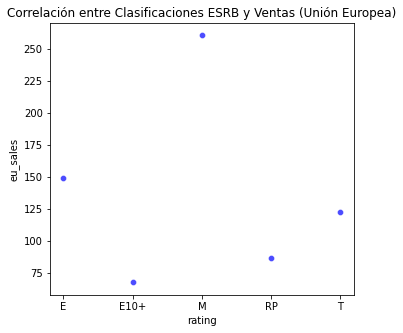

In [40]:
# Filtrar datos retomando a  -  df_top_region de 
#              4.2 Los cinco géneros principales
ue_ESRB_top = df_top_region.groupby("rating")["eu_sales"].sum().reset_index()


# Crear un gráfico de dispersión y calcular la correlación
plt.figure(figsize=(12, 5))

# Gráfico de dispersión para puntuaciones de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='rating', 
    y='eu_sales',
    data=ue_ESRB_top, 
    color='blue', 
    alpha=0.7
)
plt.title('Correlación entre Clasificaciones ESRB y Ventas (Unión Europea)')

# Mostrar el gráfico
plt.show()



#### <font color='#2D9596'>Norte América<a id='4.3.2'></a>
[Volver a Contenidos](#back)

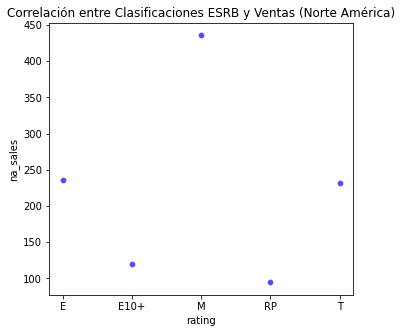

In [41]:
# Filtrar datos retomando a  -  df_top_region de 
#              4.2 Los cinco géneros principales
na_ESRB_top = df_top_region.groupby("rating")["na_sales"].sum().reset_index()


# Crear un gráfico de dispersión y calcular la correlación
plt.figure(figsize=(12, 5))

# Gráfico de dispersión para puntuaciones de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='rating', 
    y='na_sales',
    data=na_ESRB_top, 
    color='blue', 
    alpha=0.7
)
plt.title('Correlación entre Clasificaciones ESRB y Ventas (Norte América)')

# Mostrar el gráfico
plt.show()

#### <font color='#2D9596'> Japón<a id='4.3.3'></a>
[Volver a Contenidos](#back)

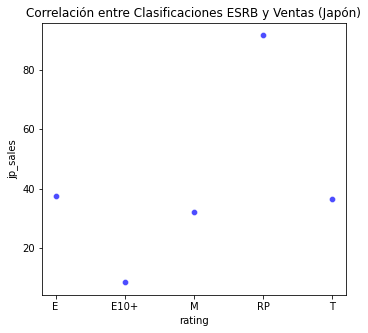

In [42]:
# Filtrar datos retomando a  -  df_top_region de 
#              4.2 Los cinco géneros principales
jp_ESRB_top = df_top_region.groupby("rating")["jp_sales"].sum().reset_index()


# Crear un gráfico de dispersión y calcular la correlación
plt.figure(figsize=(12, 5))

# Gráfico de dispersión para puntuaciones de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='rating', 
    y='jp_sales',
    data=jp_ESRB_top, 
    color='blue', 
    alpha=0.7
)
plt.title('Correlación entre Clasificaciones ESRB y Ventas (Japón)')

# Mostrar el gráfico
plt.show()

#### <font color='#2D9596'> Otras Regiones<a id='4.3.4'></a>
[Volver a Contenidos](#back)

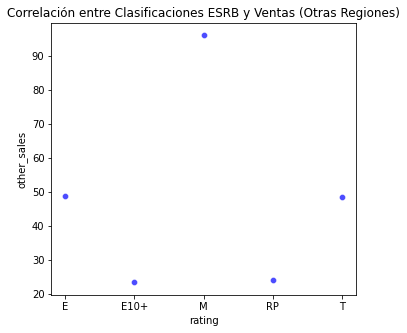

In [43]:
# Filtrar datos retomando a  -  df_top_region   de 
#              4.2 Los cinco géneros principales

other_ESRB_top = df_top_region.groupby("rating")["other_sales"].sum().reset_index()


# Crear un gráfico de dispersión y calcular la correlación
plt.figure(figsize=(12, 5))

# Gráfico de dispersión para puntuaciones de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='rating', 
    y='other_sales',
    data=other_ESRB_top, 
    color='blue', 
    alpha=0.7
)
plt.title('Correlación entre Clasificaciones ESRB y Ventas (Otras Regiones)')

# Mostrar el gráfico
plt.show()

<font color='#2D9596'> __Comentarios:__
    
> En ninguna región hay relación alguna entre las clasifiaciones y las ventas.
> la clasificación por edad no es un factor determinante para el éxito de las ventas de los videojuegos. Puede haber otros factores, como el género del juego, la popularidad de la franquicia, entre otros, que influyan más en las decisiones de compra de los usuarios.

## <font color='#711DB0'>Prueba de Hipótesis<a id='5'></a>

[Volver a Contenidos](#back)
*     5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
*     5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### <font color='#711DB0'>Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.<a id='5.1'></a>
    
<font color='#711DB0'> __Comentario:__
    <font color='#000000'>
>__Filtrado de calificaciones mayores a 0:__ 
>    
> La decisión de filtrar las calificaciones mayores a 0 se tomó para asegurarse de que solo se estén considerando calificaciones válidas. Calificaciones iguales a 0 podrían indicar datos faltantes o no válidos, por lo que filtrarlos ayuda a realizar un análisis más significativo.
>    
>    
>__Filtrado para años después de 2013:__ 
>    
>Se añadió un filtro para considerar solo los datos a partir del año 2013. Esto se hizo porque Xbox One fue lanzado en 2013, y queríamos comparar las calificaciones de usuarios de Xbox One y PC después de ese año.
>
>    
>__Prueba t de Student para muestras independientes:__ 
>    
>La prueba t de Student es una opción común para comparar las medias de dos grupos cuando se tienen muestras independientes. Se eligió ttest_ind de la biblioteca scipy.stats porque es una función ampliamente utilizada y ofrece una forma conveniente de realizar esta prueba estadística.
>
> __umbral alfa:__
> p_value < 0.05 porque estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de tipo I.
>
> En el contexto de comparar calificaciones promedio de usuarios entre Xbox One y PC, puede haber variabilidad diferente en las calificaciones de usuarios para ambas plataformas. Por lo tanto, se elige <font color='#711DB0'> __equal_var=False__ <font color='000000'>para hacer que la prueba de hipótesis sea más robusta ante la posibilidad de varianzas desiguales.
        
***
                
><font color='#711DB0'>__Hipótesis Nula (H<sub>0 </sub>):__
> <font color='000000'>
>Las calificaciones promedio de usuarios para las plataformas Xbox One y PC son iguales.
>
><font color='#711DB0'>__Hipótesis Alternativa (H<sub>1 </sub>):__
><font color='000000'>
>Las calificaciones promedio de usuarios para las plataformas Xbox One y PC no son iguales.               

In [44]:
# Retomando el Data Frame de - 2.5  -  games

# Filtrar las calificaciones de usuario para Xbox One y PC (mayores a 0 y después de 2013)
user_scores_xbox = games[
                         (games['platform'] == 'XOne') 
                       & (games['user_score'] > 0) 
                       & (games['year_of_release'] >= 2013)
    
                        ]['user_score']


user_scores_pc = games[
                         (games['platform'] == 'PC') 
                       & (games['user_score'] > 0) 
                       & (games['year_of_release'] >= 2013)
                      
                      ]['user_score']




# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = ttest_ind(
                                 user_scores_xbox, 
                                 user_scores_pc, 
                                 equal_var=False
                                )

# Imprimir el resultado de la prueba
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')
print()

# Comparar el p-valor con un nivel de significancia (por ejemplo, 0.05)
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios NO son iguales.")
else:
    print("No hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios son iguales.")




T-Statistic: 1.45192815744488
P-Value: 0.14759594013430463

No hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios son iguales.


><font color='#711DB0'>__Comentario:__
><font color='#000000'>
>    
>Las calificaciones promedio de los usuarios para XboxOne y PC son consideradas como __iguales__ según los resultados de la prueba de hipótesis.

### <font color='#711DB0'>Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.<a id='5.2'></a>

[Volver a Contenidos](#back)

<font color='#711DB0'> __Comentario:__
<font color='#000000'>
>__Filtrado de calificaciones mayores a 0__ 
>
>    
>__Prueba t de Student para muestras independientes__ 
>
> __umbral alfa: 0.05__
>
***
>
><font color='#711DB0'>__Hipótesis Nula (H<sub>0 </sub>):__
> <font color='000000'>
>Las calificaciones promedio de usuarios para los géneros Acción y Deportes son iguales.
>
><font color='#711DB0'>__Hipótesis Alternativa (H<sub>1 </sub>):__
> <font color='000000'>
>Las calificaciones promedio de usuarios para los géneros Acción y Deportes no son iguales.    
    
    

In [45]:
# Filtrar las calificaciones de usuario para juegos de Acción y Deportes
action_scores = games[
                      (games['genre'] == 'Action') 
                    & (games['user_score'] > 0) 
    
                     ]['user_score']


sports_scores = games[
                     (games['genre'] == 'Sports') 
                   & (games['user_score'] > 0) 
                      
                     ]['user_score']


# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = ttest_ind(
                                 action_scores, 
                                 sports_scores, 
                                 equal_var=False
                                )

# Imprimir el resultado de la prueba
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')
print()

# Comparar el p-valor con un nivel de significancia (por ejemplo, 0.05)
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios NO son iguales.")
else:
    print("No hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios SON iguales.")




T-Statistic: 1.57746791633354
P-Value: 0.11483818791498286

No hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios SON iguales.


><font color='#711DB0'>__Comentario:__
><font color='#000000'>
>    
>Las calificaciones promedio de usuarios para los géneros Acción y Deportes __NO__ son significativamente diferentes según la prueba de hipótesis realizada.

## <font color='#000000'>Conclusiones<a id='end'></a>
[Volver a Contenidos](#back)

<font color='#000000'>
    
__Parte 3 Highlights:__

>__3.1 Juegos que fueron lanzados en diferentes años:__
>    
>Hubo una mayor cantidad de títulos lanzados entre 2006 y 2012, coincidiendo con la séptima generación de consolas.
>    
>__3.2 Variación de las ventas:__
>    
> Cambio generacional y vida útil de plataformas:
Se observa un cambio generacional cada 7 años, y cada plataforma tiene una vida útil de aproximadamente 10 años.
>
>__3.3 Construcción de un modelo para el 2017:__
>    
>PS3 y Xbox 360 como plataformas líderes hasta 2016:
>>__3.3.1 ¿Qué plataformas son líderes en ventas?:__
>>    
>>    En ventas totales, la diferencia entre Playstation y Xbox One es de 2 a 1, pero ambas plataformas experimentan ventas promedio similares.
>>
>>__3.3.4 Gráfico de dispersión y correlación entre las reseñas y las ventas:__
>>    
>>Existe una influencia moderada de las puntuaciones de críticos en las ventas, mientras que las puntuaciones de usuarios tienen una correlación más débil con las ventas.

***
    
<font color='#86A789'>__3.1 Juegos que fueron lanzados en diferetes años__
<font color='#000000'>    
    
>En ventas totales, la diferencia entre Playstation y Xbox es de 2 a 1, pero ambas plataformas experimentan ventas promedio similares.
>
>PS3 se identifica como la plataforma líder hasta 2016, según la base de datos.
>
>Se analizaron las ventas anuales de consolas (PS3, Xbox 360, 3DS, PS4 y Xbox One) desde 2010, y se observaron tasas de crecimiento anual.
Aunque las ventas iban disminuyendo año con año, se notó un crecimiento anual positivo para PS3, PS4 y Xbox One, indicando un rendimiento relativamente sólido en comparación con las otras plataformas.   
> 
>
>Las plataformas con mayores ventas fueron PS2, Xbox 360, PS3, Wii, Nintendo DS y PS one.
Hubo una mayor cantidad de títulos lanzados entre 2006 y 2012, coincidiendo con la séptima generación de consolas.    

***
[Volver a Contenidos](#back)    
<font color='#86A789'>__Pico de Actividad entre 2006 y 2012:__
<font color='#000000'>
>Se observa un pico significativo en la cantidad de títulos lanzados entre los años 2006 y 2012.
Este período coincide con la séptima generación de consolas, lo que sugiere un aumento en la actividad de desarrollo y lanzamiento de juegos durante esta época.

***
    
<font color='#86A789'>__Séptima Generación de Consolas:__
><font color='#000000'>La concentración de lanzamientos durante estos años puede estar relacionada con el auge de la séptima generación de consolas, que incluyó plataformas como Xbox 360, PlayStation 3 y Wii.
Es probable que las oportunidades ofrecidas por estas consolas hayan atraído a desarrolladores y editores a lanzar una amplia variedad de títulos.
>
>

<font color='#86A789'>__Cambio en Tendencias de Lanzamiento:__
><font color='#000000'>El análisis destaca un período específico de actividad intensa, pero también puede ser útil examinar las razones detrás de las fluctuaciones en los lanzamientos a lo largo de los años.
>Se podrían explorar factores económicos, avances tecnológicos o cambios en las preferencias del mercado que influyeron en las estrategias de lanzamiento de los desarrolladores.
>

<font color='#86A789'>__Importancia del Contexto Histórico:__
><font color='#000000'>El análisis demuestra la importancia de considerar el contexto histórico al examinar patrones de lanzamiento de juegos.
>Las tendencias en la industria del juego están fuertemente influenciadas por factores externos como avances tecnológicos, cambios en las preferencias de los consumidores y la introducción de nuevas consolas.
>

<font color='#86A789'>__Lecciones para la Planificación Futura:__
><font color='#000000'>Los datos ofrecen información valiosa para desarrolladores y empresas que planean lanzar juegos en el futuro.
La comprensión de patrones históricos puede ayudar a prever posibles picos de actividad y ajustar estrategias de lanzamiento en consecuencia.

***
    
<font color='#E0AED0'>__3.2 Variación en las Ventas__

<font color='#E0AED0'>__Dominio de Marcas Específicas:__
><font color='#000000'>Las ventas muestran un claro dominio de Playstation, Xbox y Nintendo en ciertas plataformas, destacando especialmente a PS2, Xbox360, PS3, Wii, Nintendo DS y PS one.
Este patrón puede sugerir la popularidad y aceptación masiva de estas plataformas entre los consumidores.
>

<font color='#E0AED0'>__Importancia de la Diversidad de Plataformas:__
><font color='#000000'>Aunque algunas plataformas lideran en ventas, también es evidente la relevancia de tener una oferta diversa de plataformas exitosas.
>La presencia de diferentes plataformas exitosas indica una variedad de preferencias entre los jugadores y la necesidad de adaptarse a múltiples segmentos del mercado.
>

<font color='#E0AED0'>__Longevidad y Éxito Continuado:__
><font color='#000000'>La presencia de PS2, PS3 y Wii sugiere que algunas plataformas han mantenido un éxito sostenido durante períodos significativos de tiempo.
>Este éxito prolongado puede deberse a factores como una sólida biblioteca de juegos, innovaciones tecnológicas y estrategias de marketing efectivas.
>

<font color='#E0AED0'>__Relevancia de las Consolas Portátiles:__
><font color='#000000'>La inclusión de Nintendo DS destaca la importancia de las consolas portátiles en el panorama de ventas.
Las consolas portátiles a menudo tienen una base de usuarios leal y pueden ser fundamentales para expandir la presencia de una marca en diferentes situaciones de juego.
>
<font color='#E0AED0'>__Tendencias en la Industria:__
><font color='#000000'>El análisis de las ventas proporciona una instantánea de las preferencias del consumidor a lo largo del tiempo.
Puede ser beneficioso para los desarrolladores y editores adaptar estrategias de desarrollo y marketing según las plataformas que históricamente han tenido un rendimiento fuerte en términos de ventas.
>

<font color='#E0AED0'>__Reflejo de la Evolución Tecnológica:__
><font color='#000000'>La variación en las ventas también puede reflejar la evolución tecnológica en la industria de los videojuegos, con el surgimiento de nuevas generaciones de consolas que capturan la atención del público.
>
***
[Volver a Contenidos](#back)    
>    
><font color='#E7BCDE'>__3.2.2 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?__
>
><font color='#E7BCDE'>__Ciclos de Generación y Vida Útil de las Plataformas:__
>><font color='#000000'>La observación de un cambio generacional cada 7 años destaca la consistencia en la introducción de nuevas tecnologías y consolas en la industria.
>>La vida útil de las plataformas de 10 años sugiere que las últimas etapas de una generación pueden superponerse con las primeras etapas de la siguiente, creando una transición gradual.
>>
><font color='#E7BCDE'>__Planificación Estratégica a Largo Plazo:__
>><font color='#000000'>Para desarrolladores y fabricantes de consolas, entender y planificar en torno a estos ciclos de 7 y 10 años es crucial para el éxito a largo plazo.
>>Estrategias de desarrollo, marketing y soporte deben adaptarse a estos ciclos para aprovechar al máximo cada generación.
>>
>>    
><font color='#E7BCDE'>__Adaptación a la Evolución Tecnológica:__
>><font color='#000000'>La información sobre la vida útil de las plataformas sugiere la importancia de mantenerse al tanto de las tendencias tecnológicas y la evolución del mercado.
>>La adaptabilidad para incorporar nuevas tecnologías y conceptos es esencial para mantener la relevancia a lo largo de los ciclos de generación.
>    
>    
><font color='#E7BCDE'>__Fases de Transición y Superposición:__
>><font color='#000000'>Durante las transiciones de generación, donde una plataforma está llegando al final de su vida útil y otra está surgiendo, puede haber oportunidades únicas y desafíos para la industria.
>>La superposición de plataformas puede requerir estrategias específicas para gestionar la transición de los consumidores entre generaciones.
>>    
<font color='#E7BCDE'>__Impacto en la Estrategia de Lanzamiento de Juegos:__
>><font color='#000000'>La información sobre ciclos y vida útil de las plataformas influye en la estrategia de lanzamiento de juegos, ya que los desarrolladores deben considerar el tiempo de desarrollo y el período en el que una plataforma específica estará en su apogeo.
>>
><font color='#E7BCDE'>__Innovación como Motor de Cambio Generacional:__
>><font color='#000000'>La observación de ciclos de cambio generacional subraya la importancia de la innovación continua como un factor clave en la introducción exitosa de nuevas generaciones de consolas.

***
    
<font color='#29ADB2'>__3.3 Construcción de un modelo para el 2017__
    
__Tendencias de Crecimiento y Declive:__
<font color='#000000'>    
>A pesar de la disminución general de las ventas año tras año, el análisis anual del crecimiento proporciona información más detallada sobre el rendimiento de cada consola.
>Mientras que Xbox 360 y 3DS experimentaron tasas de crecimiento negativas, PS3, PS4 y Xbox One mostraron tasas positivas, indicando un rendimiento más robusto.
>
><font color='#29ADB2'>__3.3.2 ¿Cuáles crecen y cuáles se reducen?__
>    
>__Éxito Sostenido de PS3,PS4 y Xbox One:__
>><font color='#000000'>El crecimiento positivo en las ventas de PS3,PS4 y Xbox One sugiere que estas consolas lograron mantener o incluso aumentar su popularidad a lo largo del tiempo.
>>Puede atribuirse a factores como una sólida biblioteca de juegos, características innovadoras o estrategias de marketing efectivas.
>>
><font color='#29ADB2'>__Liderazgo Continuo de PS3:__
>><font color='#000000'>Hasta el año 2016, PS3 se consolida como la plataforma líder en ventas, mostrando un crecimiento anual positivo.
>>Este liderazgo puede atribuirse a una combinación de una sólida biblioteca de juegos, características técnicas avanzadas y una exitosa estrategia de marketing.
>>
><font color='#29ADB2'>__Xbox One como Competidor Fuerte:__
>><font color='#000000'>Con una tasa de crecimiento anual positiva, Xbox One se presenta como un competidor fuerte en el mercado de consolas hasta 2016.
>>El rendimiento positivo puede indicar la adopción favorable de los consumidores y estrategias efectivas por parte de Microsoft.
>
>    
***
[Volver a Contenidos](#back)
<font color='#CE5A67'>__3.3.3 ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?   (Diagrama de caja)__  
    
    
<font color='#CE5A67'>__Diferencias en Ventas Totales y Promedio:__
><font color='#000000'>Aunque la diferencia en las ventas totales entre PlayStation 4 y XboxOne es considerable (con una proporción de 2 a 1), y la similitud en las ventas promedio de Playstation 3 y Xbox 360 sugiere que, en términos generales, los juegos en ambas plataformas tienen un rendimiento similar en términos de unidades vendidas.
    
<font color='#CE5A67'>__Compartir de Títulos entre Plataformas:__
><font color='#000000'>La similitud en las ventas promedio podría deberse a la presencia de juegos compartidos entre PlayStation y Xbox. Juegos multiplataforma pueden contribuir de manera similar a las ventas de ambas consolas.
>    
    
<font color='#CE5A67'>__Influencia de Exclusivos en Ventas Totales:__
><font color='#000000'>La presencia de valores atípicos en las ventas totales podría estar relacionada con juegos exclusivos de cada plataforma. Estos títulos exclusivos pueden tener un impacto significativo en las ventas totales y explicar la brecha entre PlayStation y Xbox.
>    
    
<font color='#CE5A67'>__Enfoque Exclusivo de 3DS:__
><font color='#000000'>La conclusión de que los juegos para la 3DS son en su mayoría exclusivos podría sugerir un enfoque más centrado en títulos exclusivos para esta plataforma. Esto puede ser una estrategia consciente para diferenciarse en el mercado de consolas portátiles.
>    
    
<font color='#CE5A67'>__Importancia de Exclusivos en la Competencia:__
><font color='#000000'>La presencia de valores atípicos relacionados con exclusivos resalta la importancia de estos juegos en la competencia entre plataformas. Títulos exclusivos pueden ser un factor clave para atraer y retener a los jugadores.
>    
    
<font color='#CE5A67'>__Consideraciones Estratégicas:__
><font color='#000000'>Para las empresas de videojuegos, estas conclusiones sugieren que la estrategia de desarrollo y lanzamiento de juegos exclusivos puede tener un impacto significativo en el rendimiento general de una plataforma.    
>    
***
    
<font color='#AD8E70'>__3.3.4 Gráfico de dispersión y correlación entre las reseñas y las ventas:__
    
__Influencia Moderada de Puntuaciones de Críticos en Ventas:__
><font color='#000000'>La correlación entre puntuaciones de críticos y ventas es moderadamente positiva, aproximadamente 0.3.
>    
    
<font color='#AD8E70'>__Débil Correlación entre Puntuaciones de Usuarios y Ventas:__
><font color='#000000'>La correlación entre las puntuaciones de usuarios y las ventas es cercana a cero, lo que sugiere una falta de correlación significativa.
La correlación entre puntuaciones de usuarios y ventas es cercana a cero, alrededor de 0.03.
>   
> A partir de estos resultados, no podemos afirmar que las puntuaciones de críticos o usuarios tengan una correlación fuerte con las ventas de videojuegos.
Se sugiere que otros factores o variables pueden influir significativamente en el rendimiento de las ventas de los videojuegos, y no se puede atribuir exclusivamente a las opiniones de críticos o usuarios.    
    
<font color='#AD8E70'>__Factores Adicionales en la Decisión de Compra:__
><font color='#000000'>La débil correlación con las puntuaciones de usuarios sugiere que las decisiones de compra pueden estar influenciadas por otros factores, como el marketing, la popularidad de la franquicia o la recomendación personal, más que las opiniones de otros jugadores.
>    
***
[Volver a Contenidos](#back)
    
<font color='#5CB8E4'>__3.3.5 Ventas totales de juegos por cada plataforma y juegos compartidos__
    
__Popularidad de PlayStation:__
><font color='#000000'>PlayStation (PS4) lidera en términos de la cantidad total de juegos lanzados durante el tiempo de vida de la plataforma con 392 títulos.
>La plataforma tiene la mayor cantidad de juegos compartidos, lo que destaca su popularidad y la diversidad de títulos disponibles.
>    
   
<font color='#5CB8E4'>__Concentración de Títulos Compartidos entre Xbox y PlayStation:__
><font color='#000000'>La gran cantidad de juegos compartidos (217) entre Xbox y PlayStation sugiere una fuerte intersección en términos de títulos disponibles para ambas plataformas.
>El hecho de que el 55.3% de los juegos de PS4 y el 87.8% de los juegos de Xbox One, y, por otro lado Xbox 360: 78.3% y PS3: 53.27%  sean compartidos indica una estrategia significativa de lanzamiento de títulos multiplataforma.
>    
    
<font color='#5CB8E4'>__Estrategia Selectiva de Nintendo:__
><font color='#000000'>
>La baja proporción de juegos compartidos en 3DS (3.1%) resalta la preferencia de Nintendo por lanzar títulos exclusivos para sus consolas portátiles.
>    
    
<font color='#5CB8E4'>__Competencia entre PlayStation y Xbox:__
><font color='#000000'>La alta intersección de títulos entre Xbox y PlayStation, así como la cantidad total de títulos compartidos, sugiere una competencia significativa entre estas dos plataformas.
>Los desarrolladores parecen estar enfocándose en lanzar títulos para ambas consolas, posiblemente para maximizar su alcance de audiencia.
    
    
<font color='#5CB8E4'>__Estrategias Diferentes en el Mercado:__
><font color='#000000'>La estrategia de lanzar títulos exclusivos de manera más selectiva por parte de Nintendo puede estar alineada con la diversificación del mercado y la creación de experiencias únicas para sus plataformas.
>
    
***
[Volver a Contenidos](#back)   
<font color='#F8CB2E'>__3.3.6 Distribución general de los juegos por género.__

>__XBOX y Playstation:__
>
>__Preferencia por Shooter:__
>><font color='#000000'>
>>Xbox One y PS4: Preferencia por juegos de disparos.
>>
>>Xbox 360 y PS3: También prefieren juegos de disparos.
>>
>>Nintendo: Inclinación hacia juegos de rol y acción en lugar de shooters.
>    
><font color='#F8CB2E'>__Énfasis en Action:__
>><font color='#000000'>Todas las plataformas comparten la preferencia por juegos de acción.
>   
>    
><font color='#F8CB2E'>__Interés Común en Sports y Role-Playing:__
>><font color='#000000'>La preferencia por juegos de deportes (Sports) en XBOX y PS4 indica una audiencia interesada en experiencias competitivas y recreativas. Además, el interés compartido en juegos de rol (Role-Playing) sugiere una apreciación por narrativas más inmersivas y extensas.
>    
>    
><font color='#F8CB2E'>__Apreciación por Racing:__
>><font color='#000000'>La categoría de juegos de carreras (Racing) también es apreciada en ambas plataformas, lo que refleja el interés en experiencias de conducción y competición.
>
>
><font color='#F8CB2E'>__Apreciación por Deportes:__
>><font color='#000000'>Xbox y Playstation: Inclinación hacia juegos de deportes.
>>
>>Nintendo: Prefiere juegos de plataformas en lugar de deportes.   
>    
><font color='#F8CB2E'>__Nintendo:__
>
>__Preferencia por Action y Platform:__
>><font color='#000000'>Nintendo muestra una inclinación hacia juegos de acción (Action) y Rol (Rol-Playing). Esto sugiere una estrategia diferente, enfocándose en experiencias de juego más orientadas a la acción y plataformas.
>    
>    
><font color='#F8CB2E'>__Interés en Fighting:__
>><font color='#000000'>La preferencia por juegos de lucha (Fighting) en Nintendo indica una audiencia que valora la competencia mano a mano y la destreza en los combates.
>   
>    
><font color='#F8CB2E'>__Roles y Racing en Común:__
>><font color='#000000'>Al igual que XBOX y PS4, Nintendo comparte el interés por juegos de rol (Role-Playing) y juegos de carreras (Racing), lo que sugiere que estos géneros tienen un atractivo generalizado.
>    
    
<font color='#F8CB2E'>__Conclusiones Generales:__

><font color='#F8CB2E'>__Similitudes y Diferencias:__
>><font color='#000000'>Aunque hay similitudes en las preferencias de géneros entre XBOX y Playstation, también hay diferencias notables, como la preferencia por juegos de deportes en XBOX y Playstation y el énfasis en la acción en ambas plataformas.
>>Nintendo adopta una estrategia diferente al centrarse en juegos de Rol y acción, destacando su enfoque único en comparación con las otras dos plataformas.
>   
>    
><font color='#F8CB2E'>__Diversificación de Oferta:__
>><font color='#000000'>Las preferencias de géneros reflejan la estrategia de cada plataforma para diversificar su oferta y satisfacer las preferencias específicas de su audiencia.
>    
>    
><font color='#F8CB2E'>__Oportunidades para Desarrolladores:__
>><font color='#000000'>Los desarrolladores pueden considerar estas preferencias al crear títulos multiplataforma o exclusivos, adaptándose a las tendencias específicas de cada plataforma.
    
    
***
[Volver a Contenidos](#back)  
<font color='#2EB086'>__Parte 4 Perfil del usuario por cada región__
    
__Diversidad en Preferencias Regionales:__
><font color='#000000'>La investigación revela una diversidad significativa en las preferencias regionales en la industria de videojuegos. Mientras que hay consistencia en algunas áreas, como >Norteamérica y la Unión Europea, Japón presenta preferencias únicas que reflejan diferencias culturales.
    
<font color='#2EB086'>__Competencia Intensa en Norte América:__
><font color='#000000'>Norte América se destaca como el mercado más competitivo, con una intensa competencia entre Xbox y PlayStation. La preferencia por Xbox en esta región es notable y sugiere estrategias de marketing y lanzamiento específicas.
>    
    
<font color='#2EB086'>__Impacto de las Preferencias Culturales:__
><font color='#000000'>Las preferencias en Japón, particularmente por juegos de rol y acción, destacan la influencia de las preferencias culturales en las elecciones de videojuegos. Las estrategias de marketing deben adaptarse a estas diferencias culturales.
>    
    
<font color='#2EB086'>__Consistencia en Preferencias Globales:__
><font color='#000000'>La consistencia en las preferencias de géneros entre la Unión Europea, América del Norte y Otras Regiones sugiere que hay patrones globales de consumo de videojuegos. Géneros como Action y Shooter son populares en múltiples regiones.
>    
    
<font color='#2EB086'>__Importancia Estratégica de PlayStation:__
><font color='#000000'>La dominancia continua de PlayStation en la Unión Europea y Otras Regiones, resalta la importancia estratégica de esta plataforma a nivel global. Desarrolladores y editores deben considerar esta popularidad al planificar lanzamientos.
>    
    
<font color='#2EB086'>__Adaptación Estratégica a Preferencias Locales:__
><font color='#000000'>Reconocer las preferencias regionales es clave para el éxito en el mercado de videojuegos. Adaptar estrategias de lanzamiento y marketing según las preferencias específicas de cada región puede aumentar la receptividad del público.
>    
    
<font color='#2EB086'>__Diversidad en Impacto de Clasificaciones ESRB:__
><font color='#000000'>La falta de relación entre las clasificaciones ESRB y las ventas en todas las regiones sugiere que la clasificación por edad no es un factor determinante para el éxito de las ventas de los videojuegos. Otros factores, como el género del juego y la popularidad de la franquicia, pueden ser más influyentes.
>    
    
<font color='#2EB086'>__Oportunidades de Desarrollo Segmentadas:__
><font color='#000000'>Considerar la popularidad de ciertos géneros en diferentes regiones ofrece oportunidades para el desarrollo de nuevos juegos o adaptaciones que resuenen fuertemente con las audiencias locales. La personalización de contenido puede ser clave para maximizar el atractivo.
    
***
 
<font color='#FF5959'>__Parte 5 Prueba de hipótesis__

<font color='#FF5959'>__5.1 Calificaciones Promedio de Usuarios entre Xbox One y PC:__

Resultado: <font color='#000000'>
>T-Statistic: 1.57746791633354
>    
>P-Value: 0.11483818791498286
  
<font color='#FF5959'>__Conclusión:__ <font color='#000000'>No hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios para Xbox One y PC son iguales.
    
    
<font color='#FF5959'>__Implicaciones:__<font color='#000000'> No existe una diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC después de 2013. Esto podría indicar preferencias o experiencias similares de los usuarios en estas plataformas.


<font color='#FF5959'>__5.2 Calificaciones Promedio de Usuarios entre los Géneros de Acción y Deportes:__

Resultado: <font color='#000000'>
>T-Statistic: 1.57746791633354
>    
>P-Value: 0.11483818791498286
    
<font color='#FF5959'>__Conclusión:__ <font color='#000000'> NO hay evidencia para rechazar la hipótesis nula. Las calificaciones promedio de usuarios para los géneros de Acción y Deportes son iguales.
    
<font color='#FF5959'>__Implicaciones:__ <font color='#000000'>No hay una diferencia significativa en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes. Esto sugiere que, en términos de calificaciones de usuarios, ambos géneros son percibidos de manera diferente.

[Volver a Contenidos](#back)   